# Normal Days Data


In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the datasets
normal_data = pd.read_csv('/home/aveb7tacoma/engr697/data/normal_days_weather_data.csv')
wildfire_data = pd.read_csv('/home/aveb7tacoma/engr697/data/wildfire_weather_clean_indexes3.csv')

print("Normal data shape:", normal_data.shape)
print("Wildfire data shape:", wildfire_data.shape)
print("\nNormal data columns:", normal_data.columns.tolist())
print("\nWildfire data columns:", wildfire_data.columns.tolist())


Normal data shape: (153, 23)
Wildfire data shape: (123, 23)

Normal data columns: ['Date', 'Max_Temp_F', 'Avg_Temp_F', 'Min_Temp_F', 'Max_Humidity_', 'Avg_Humidity_', 'Min_Humidity_', 'Max_Wind_Speed_mph', 'Avg_Wind_Speed_mph', 'Min_Wind_Speed_mph', 'Max_Pressure_in', 'Avg_Pressure_in', 'Min_Pressure_in', 'PM25_ugm3', 'CO2_ppm', 'yn', 'City', 'Climate', 'NOx_ppb', 'dryness_index ', 'dispersion_ratio', 'PressureAnomaly1', 'pm2.5 difference']

Wildfire data columns: ['Date', 'Max_Temp_F', 'Avg_Temp_F', 'Min_Temp_F', 'Max_Humidity_', 'Avg_Humidity_', 'Min_Humidity_', 'Max_Wind_Speed_mph', 'Avg_Wind_Speed_mph', 'Min_Wind_Speed_mph', 'Max_Pressure_in', 'Avg_Pressure_in', 'Min_Pressure_in', 'PM25_ugm3', 'CO2_ppm', 'yn', 'City', 'Climate', 'NOx_ppb', 'dryness_index ', 'dispersion_ratio', 'PressureAnomaly1', 'pm2.5 difference']


In [111]:
# Filter data for Santa Rosa city
santa_rosa_normal = normal_data[normal_data['City'] == 'Santa Rosa'].copy()
santa_rosa_wildfire = wildfire_data[wildfire_data['City'] == 'Santa Rosa'].copy()

print("Santa Rosa normal data shape:", santa_rosa_normal.shape)
print("Santa Rosa wildfire data shape:", santa_rosa_wildfire.shape)

# Display first few rows to understand the data structure
print("\nSanta Rosa normal data sample:")
print(santa_rosa_normal[['Date', 'PM25_ugm3', 'NOx_ppb', 'yn']].head())

print("\nSanta Rosa wildfire data sample:")
print(santa_rosa_wildfire[['Date', 'PM25_ugm3', 'NOx_ppb', 'yn']].head())


Santa Rosa normal data shape: (31, 23)
Santa Rosa wildfire data shape: (31, 23)

Santa Rosa normal data sample:
        Date PM25_ugm3 NOx_ppb  yn
0  10/1/2024         6    0.01   0
1  10/2/2024       8.2   0.006   0
2  10/3/2024       8.4   0.006   0
3  10/4/2024       5.9   0.006   0
4  10/5/2024       3.1   0.006   0

Santa Rosa wildfire data sample:
        Date  PM25_ugm3  NOx_ppb  yn
0  10/1/2017        4.8      8.6   0
1  10/2/2017        7.2     14.4   0
2  10/3/2017        5.7     16.6   0
3  10/4/2017        5.2     15.7   0
4  10/5/2017        4.4     14.8   0


In [112]:
# Combine both datasets and handle missing data
# First, let's combine the datasets
combined_data = pd.concat([santa_rosa_normal, santa_rosa_wildfire], ignore_index=True)

# Handle missing data by setting to 99 for outlier identification
# Convert PM25_ugm3 and NOx_ppb to numeric, replacing non-numeric values with NaN first
combined_data['PM25_ugm3'] = pd.to_numeric(combined_data['PM25_ugm3'], errors='coerce')
combined_data['NOx_ppb'] = pd.to_numeric(combined_data['NOx_ppb'], errors='coerce')

# Replace NaN values with 99 for outlier identification
combined_data['PM25_ugm3'] = combined_data['PM25_ugm3'].fillna(99)
combined_data['NOx_ppb'] = combined_data['NOx_ppb'].fillna(99)

print("Combined data shape:", combined_data.shape)
print("\nMissing data summary:")
print("PM25_ugm3 missing (set to 99):", (combined_data['PM25_ugm3'] == 99).sum())
print("NOx_ppb missing (set to 99):", (combined_data['NOx_ppb'] == 99).sum())

# Check the yn column values
print("\nFire day (yn) distribution:")
print(combined_data['yn'].value_counts())


Combined data shape: (62, 23)

Missing data summary:
PM25_ugm3 missing (set to 99): 5
NOx_ppb missing (set to 99): 1

Fire day (yn) distribution:
yn
0    38
1    24
Name: count, dtype: int64


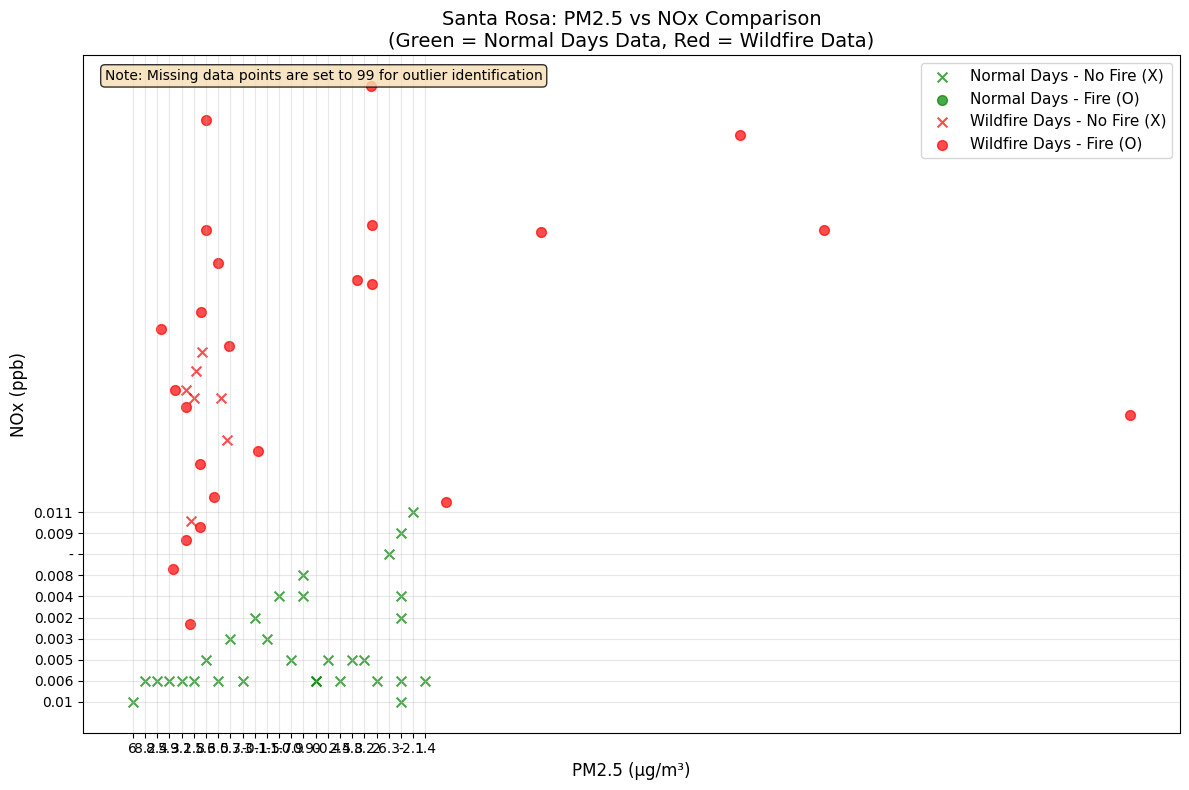

Summary Statistics for Santa Rosa:
Total data points: 62
Normal days data: 31
Wildfire days data: 31

Normal Days Data:
  No fire days: 31
  Fire days: 0

Wildfire Days Data:
  No fire days: 7
  Fire days: 24

PM2.5 Statistics:
  Mean: 16.33 μg/m³
  Median: 5.50 μg/m³
  Max: 99.00 μg/m³

NOx Statistics:
  Mean: 9.58 ppb
  Median: 5.00 ppb
  Max: 99.00 ppb


In [113]:
# Create scatter plot comparing PM25 and NOx data for Santa Rosa
plt.figure(figsize=(12, 8))

# Separate data by dataset source and fire day status
# Normal days data (green markers)
normal_no_fire = santa_rosa_normal[santa_rosa_normal['yn'] == 0]
normal_fire = santa_rosa_normal[santa_rosa_normal['yn'] == 1]

# Wildfire data (red markers)
wildfire_no_fire = santa_rosa_wildfire[santa_rosa_wildfire['yn'] == 0]
wildfire_fire = santa_rosa_wildfire[santa_rosa_wildfire['yn'] == 1]

# Create scatter plot
# Green X markers for normal days with no fire
plt.scatter(normal_no_fire['PM25_ugm3'], normal_no_fire['NOx_ppb'], 
           marker='x', s=50, alpha=0.7, color='green', label='Normal Days - No Fire (X)')

# Green O markers for normal days with fire
plt.scatter(normal_fire['PM25_ugm3'], normal_fire['NOx_ppb'], 
           marker='o', s=50, alpha=0.7, color='green', label='Normal Days - Fire (O)')

# Red X markers for wildfire days with no fire
plt.scatter(wildfire_no_fire['PM25_ugm3'], wildfire_no_fire['NOx_ppb'], 
           marker='x', s=50, alpha=0.7, color='red', label='Wildfire Days - No Fire (X)')

# Red O markers for wildfire days with fire
plt.scatter(wildfire_fire['PM25_ugm3'], wildfire_fire['NOx_ppb'], 
           marker='o', s=50, alpha=0.7, color='red', label='Wildfire Days - Fire (O)')

# Customize the plot
plt.xlabel('PM2.5 (μg/m³)', fontsize=12)
plt.ylabel('NOx (ppb)', fontsize=12)
plt.title('Santa Rosa: PM2.5 vs NOx Comparison\n(Green = Normal Days Data, Red = Wildfire Data)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Add note about missing data
plt.text(0.02, 0.98, 'Note: Missing data points are set to 99 for outlier identification', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Print summary statistics
print("Summary Statistics for Santa Rosa:")
print(f"Total data points: {len(combined_data)}")
print(f"Normal days data: {len(santa_rosa_normal)}")
print(f"Wildfire days data: {len(santa_rosa_wildfire)}")
print(f"\nNormal Days Data:")
print(f"  No fire days: {len(normal_no_fire)}")
print(f"  Fire days: {len(normal_fire)}")
print(f"\nWildfire Days Data:")
print(f"  No fire days: {len(wildfire_no_fire)}")
print(f"  Fire days: {len(wildfire_fire)}")
print(f"\nPM2.5 Statistics:")
print(f"  Mean: {combined_data['PM25_ugm3'].mean():.2f} μg/m³")
print(f"  Median: {combined_data['PM25_ugm3'].median():.2f} μg/m³")
print(f"  Max: {combined_data['PM25_ugm3'].max():.2f} μg/m³")
print(f"\nNOx Statistics:")
print(f"  Mean: {combined_data['NOx_ppb'].mean():.2f} ppb")
print(f"  Median: {combined_data['NOx_ppb'].median():.2f} ppb")
print(f"  Max: {combined_data['NOx_ppb'].max():.2f} ppb")


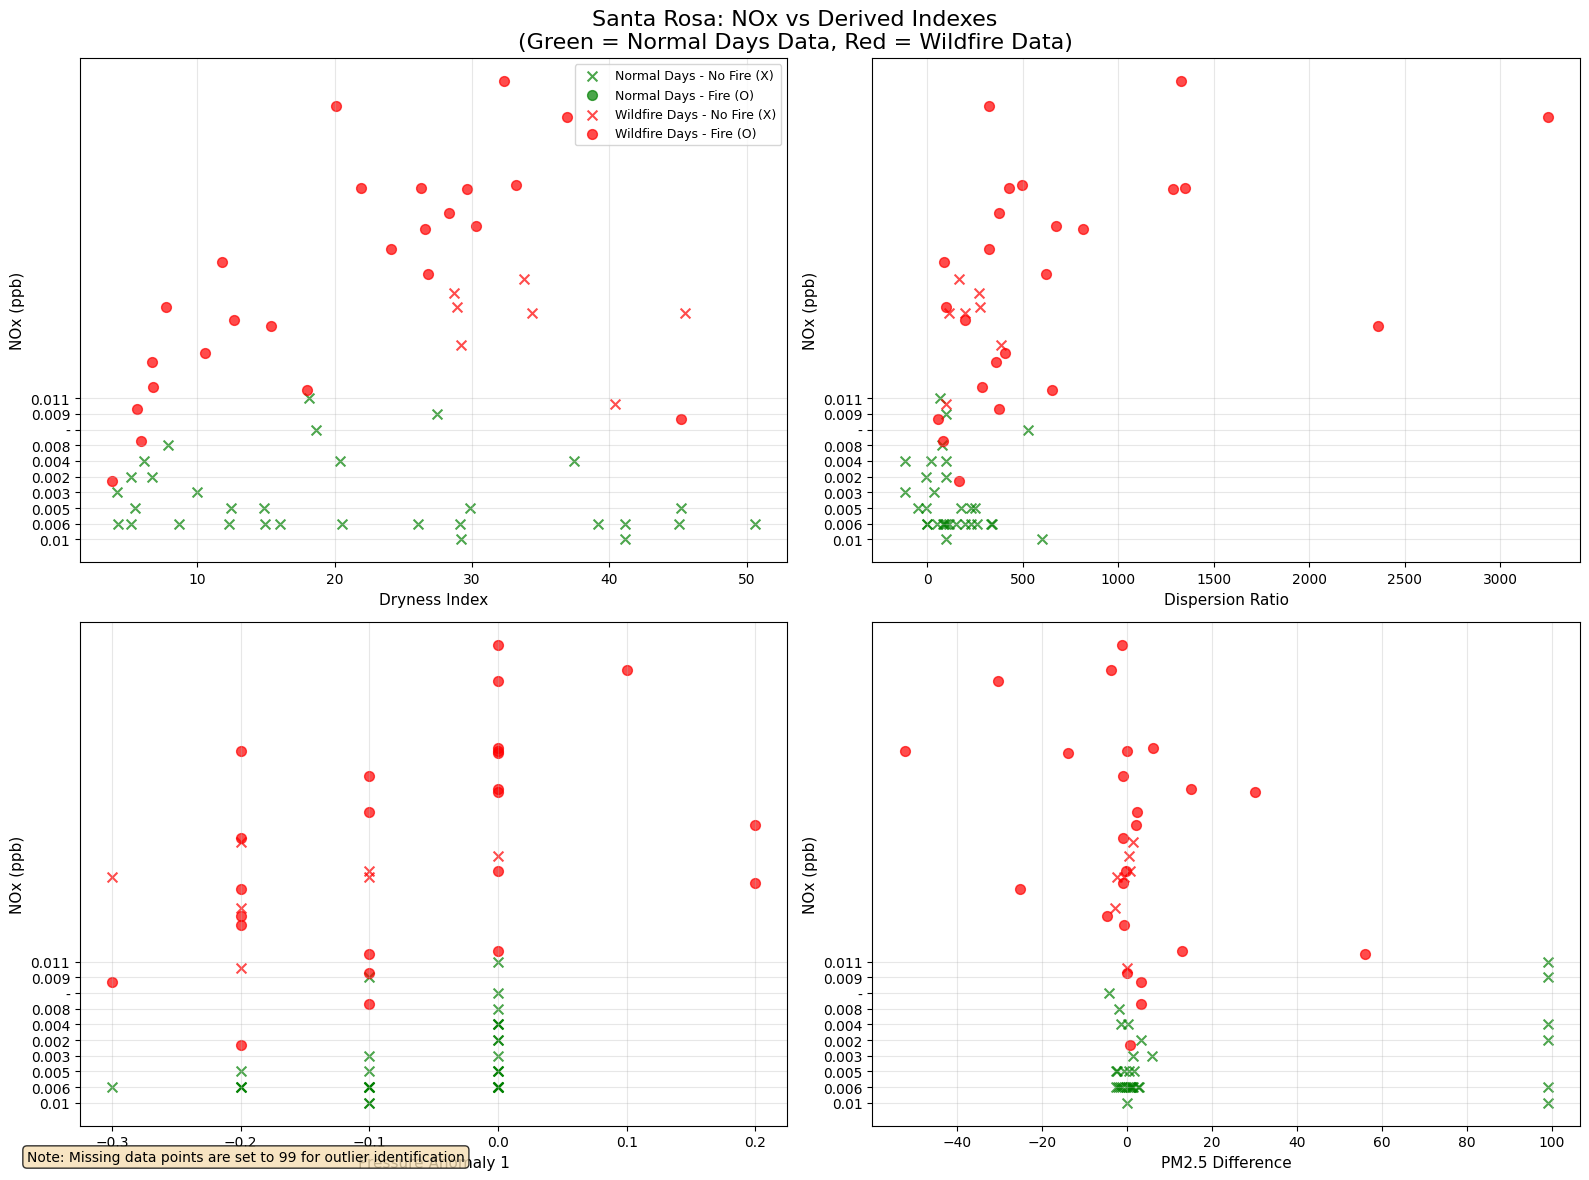

Summary Statistics for Derived Indexes:

Dryness Index:
  Mean: 22.27
  Median: 21.23
  Max: 50.62
  Min: 3.80
  Missing data (set to 99): 0

Dispersion Ratio:


TypeError: can only concatenate str (not "float") to str

In [114]:
# Create scatter plots comparing NOx against the four derived indexes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Santa Rosa: NOx vs Derived Indexes\n(Green = Normal Days Data, Red = Wildfire Data)', fontsize=16)

# Define the derived indexes to plot
indexes = ['dryness_index ', 'dispersion_ratio', 'PressureAnomaly1', 'pm2.5 difference']
index_names = ['Dryness Index', 'Dispersion Ratio', 'Pressure Anomaly 1', 'PM2.5 Difference']

# Flatten axes for easier indexing
axes = axes.flatten()

for i, (index, name) in enumerate(zip(indexes, index_names)):
    ax = axes[i]
    
    # Handle missing data for this index (set to 99 for outlier identification)
    santa_rosa_normal[index] = pd.to_numeric(santa_rosa_normal[index], errors='coerce').fillna(99)
    santa_rosa_wildfire[index] = pd.to_numeric(santa_rosa_wildfire[index], errors='coerce').fillna(99)
    
    # Separate data by dataset source and fire day status
    normal_no_fire = santa_rosa_normal[santa_rosa_normal['yn'] == 0]
    normal_fire = santa_rosa_normal[santa_rosa_normal['yn'] == 1]
    wildfire_no_fire = santa_rosa_wildfire[santa_rosa_wildfire['yn'] == 0]
    wildfire_fire = santa_rosa_wildfire[santa_rosa_wildfire['yn'] == 1]
    
    # Create scatter plot
    # Green X markers for normal days with no fire
    ax.scatter(normal_no_fire[index], normal_no_fire['NOx_ppb'], 
               marker='x', s=50, alpha=0.7, color='green', label='Normal Days - No Fire (X)')
    
    # Green O markers for normal days with fire
    ax.scatter(normal_fire[index], normal_fire['NOx_ppb'], 
               marker='o', s=50, alpha=0.7, color='green', label='Normal Days - Fire (O)')
    
    # Red X markers for wildfire days with no fire
    ax.scatter(wildfire_no_fire[index], wildfire_no_fire['NOx_ppb'], 
               marker='x', s=50, alpha=0.7, color='red', label='Wildfire Days - No Fire (X)')
    
    # Red O markers for wildfire days with fire
    ax.scatter(wildfire_fire[index], wildfire_fire['NOx_ppb'], 
               marker='o', s=50, alpha=0.7, color='red', label='Wildfire Days - Fire (O)')
    
    # Customize each subplot
    ax.set_xlabel(name, fontsize=11)
    ax.set_ylabel('NOx (ppb)', fontsize=11)
    ax.grid(True, alpha=0.3)
    
    # Add legend only to the first subplot to avoid clutter
    if i == 0:
        ax.legend(fontsize=9, loc='upper right')

# Add overall note about missing data
fig.text(0.02, 0.02, 'Note: Missing data points are set to 99 for outlier identification', 
         fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Print summary statistics for each index
print("Summary Statistics for Derived Indexes:")
for index, name in zip(indexes, index_names):
    print(f"\n{name}:")
    print(f"  Mean: {combined_data[index].mean():.2f}")
    print(f"  Median: {combined_data[index].median():.2f}")
    print(f"  Max: {combined_data[index].max():.2f}")
    print(f"  Min: {combined_data[index].min():.2f}")
    print(f"  Missing data (set to 99): {(combined_data[index] == 99).sum()}")


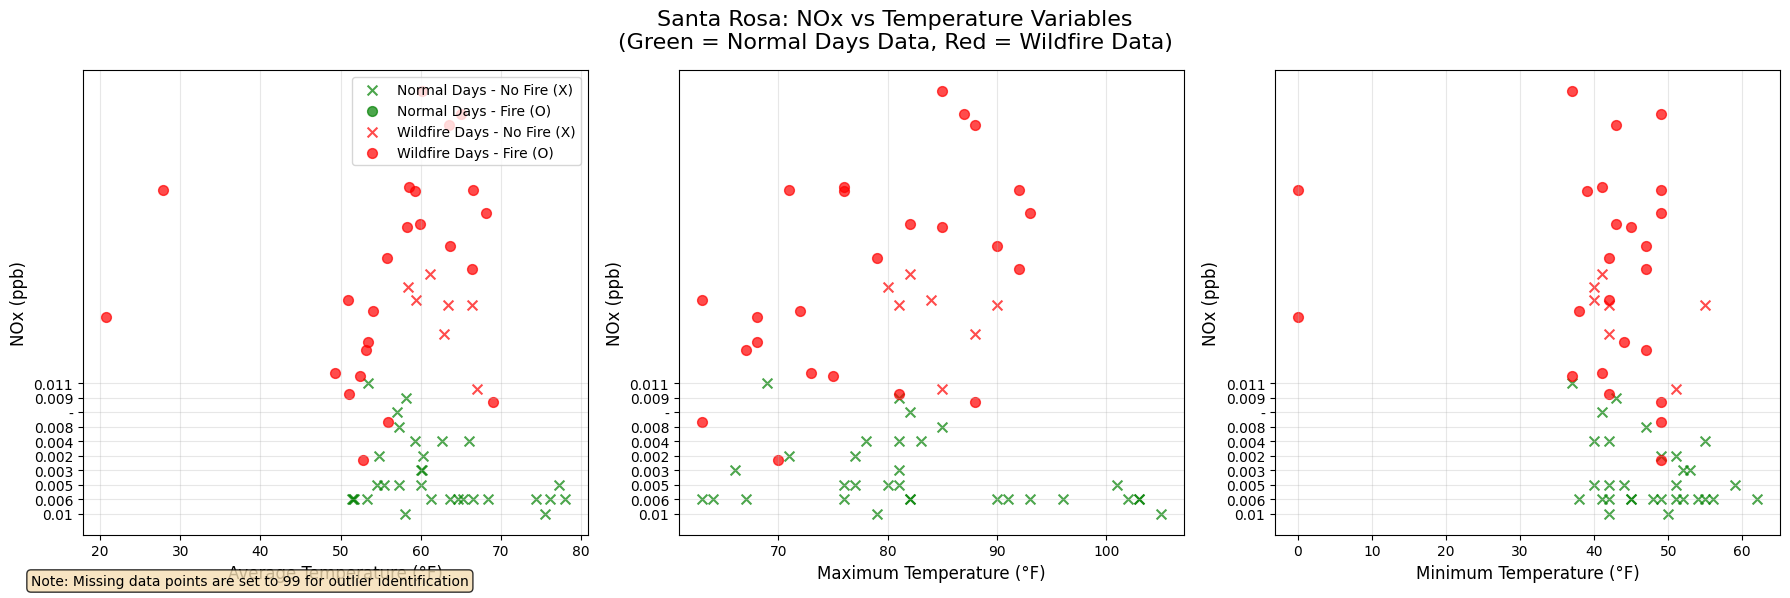

Summary Statistics for Temperature Variables:

Average Temperature (°F):
  Mean: 59.48 °F
  Median: 59.65 °F
  Max: 78.00 °F
  Min: 20.70 °F
  Missing data (set to 99): 0

Maximum Temperature (°F):
  Mean: 81.27 °F
  Median: 81.00 °F
  Max: 105.00 °F
  Min: 63.00 °F
  Missing data (set to 99): 0

Minimum Temperature (°F):
  Mean: 44.45 °F
  Median: 44.50 °F
  Max: 62.00 °F
  Min: 0.00 °F
  Missing data (set to 99): 0


In [ ]:
# Create scatter plots comparing NOx against temperature variables
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Santa Rosa: NOx vs Temperature Variables\n(Green = Normal Days Data, Red = Wildfire Data)', fontsize=16)

# Define the temperature variables to plot
temp_vars = ['Avg_Temp_F', 'Max_Temp_F', 'Min_Temp_F']
temp_names = ['Average Temperature (°F)', 'Maximum Temperature (°F)', 'Minimum Temperature (°F)']

for i, (temp_var, name) in enumerate(zip(temp_vars, temp_names)):
    ax = axes[i]
    
    # Handle missing data for temperature (set to 99 for outlier identification)
    santa_rosa_normal[temp_var] = pd.to_numeric(santa_rosa_normal[temp_var], errors='coerce').fillna(99)
    santa_rosa_wildfire[temp_var] = pd.to_numeric(santa_rosa_wildfire[temp_var], errors='coerce').fillna(99)
    
    # Separate data by dataset source and fire day status
    normal_no_fire = santa_rosa_normal[santa_rosa_normal['yn'] == 0]
    normal_fire = santa_rosa_normal[santa_rosa_normal['yn'] == 1]
    wildfire_no_fire = santa_rosa_wildfire[santa_rosa_wildfire['yn'] == 0]
    wildfire_fire = santa_rosa_wildfire[santa_rosa_wildfire['yn'] == 1]
    
    # Create scatter plot
    # Green X markers for normal days with no fire
    ax.scatter(normal_no_fire[temp_var], normal_no_fire['NOx_ppb'], 
               marker='x', s=50, alpha=0.7, color='green', label='Normal Days - No Fire (X)')
    
    # Green O markers for normal days with fire
    ax.scatter(normal_fire[temp_var], normal_fire['NOx_ppb'], 
               marker='o', s=50, alpha=0.7, color='green', label='Normal Days - Fire (O)')
    
    # Red X markers for wildfire days with no fire
    ax.scatter(wildfire_no_fire[temp_var], wildfire_no_fire['NOx_ppb'], 
               marker='x', s=50, alpha=0.7, color='red', label='Wildfire Days - No Fire (X)')
    
    # Red O markers for wildfire days with fire
    ax.scatter(wildfire_fire[temp_var], wildfire_fire['NOx_ppb'], 
               marker='o', s=50, alpha=0.7, color='red', label='Wildfire Days - Fire (O)')
    
    # Customize each subplot
    ax.set_xlabel(name, fontsize=12)
    ax.set_ylabel('NOx (ppb)', fontsize=12)
    ax.grid(True, alpha=0.3)
    
    # Add legend only to the first subplot to avoid clutter
    if i == 0:
        ax.legend(fontsize=10, loc='upper right')

# Add overall note about missing data
fig.text(0.02, 0.02, 'Note: Missing data points are set to 99 for outlier identification', 
         fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Print summary statistics for each temperature variable
print("Summary Statistics for Temperature Variables:")
for temp_var, name in zip(temp_vars, temp_names):
    print(f"\n{name}:")
    print(f"  Mean: {combined_data[temp_var].mean():.2f} °F")
    print(f"  Median: {combined_data[temp_var].median():.2f} °F")
    print(f"  Max: {combined_data[temp_var].max():.2f} °F")
    print(f"  Min: {combined_data[temp_var].min():.2f} °F")
    print(f"  Missing data (set to 99): {(combined_data[temp_var] == 99).sum()}")


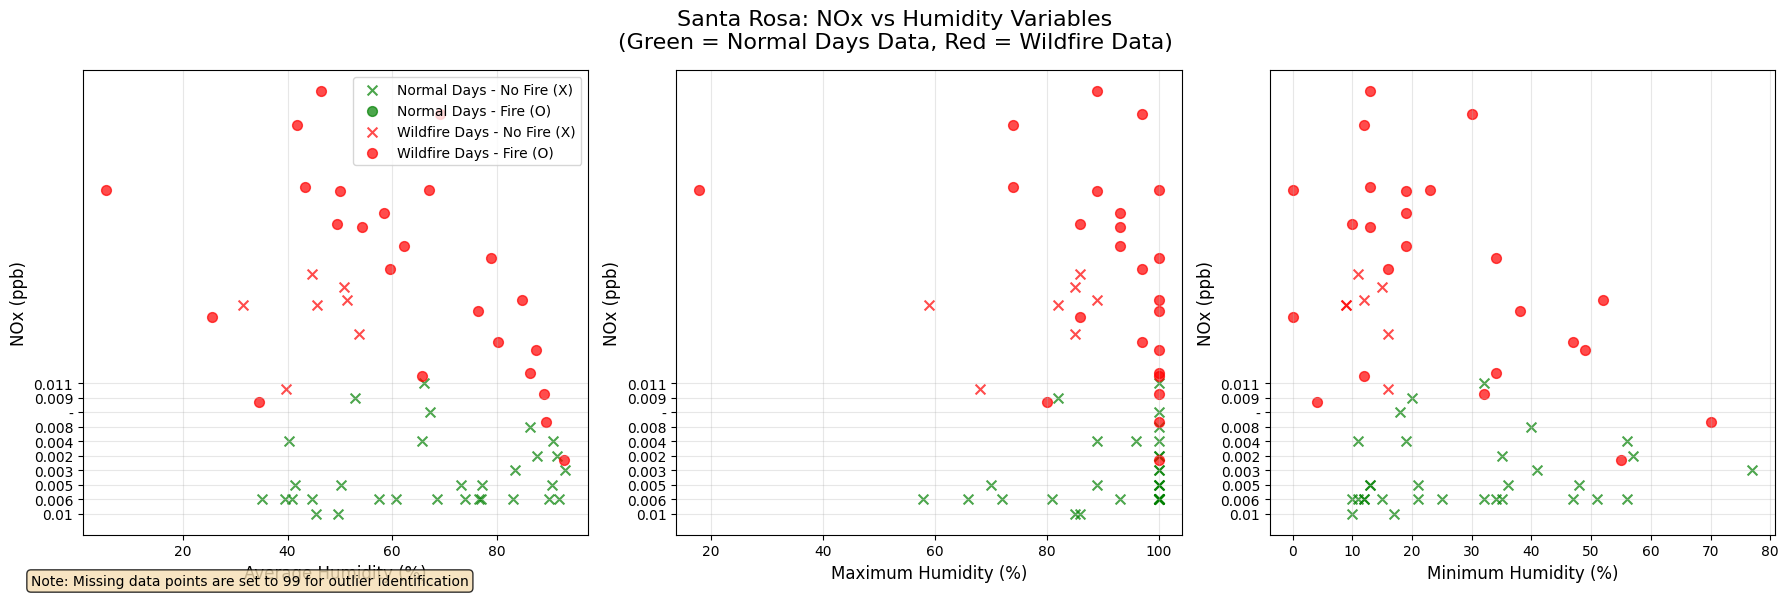

Summary Statistics for Humidity Variables:

Average Humidity (%):
  Mean: 63.01%
  Median: 63.90%
  Max: 93.10%
  Min: 5.30%
  Missing data (set to 99): 0

Maximum Humidity (%):
  Mean: 90.11%
  Median: 97.00%
  Max: 100.00%
  Min: 18.00%
  Missing data (set to 99): 0

Minimum Humidity (%):
  Mean: 26.24%
  Median: 19.00%
  Max: 77.00%
  Min: 0.00%
  Missing data (set to 99): 0


In [ ]:
# Create scatter plots comparing NOx against humidity variables
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Santa Rosa: NOx vs Humidity Variables\n(Green = Normal Days Data, Red = Wildfire Data)', fontsize=16)

# Define the humidity variables to plot
humidity_vars = ['Avg_Humidity_', 'Max_Humidity_', 'Min_Humidity_']
humidity_names = ['Average Humidity (%)', 'Maximum Humidity (%)', 'Minimum Humidity (%)']

for i, (humidity_var, name) in enumerate(zip(humidity_vars, humidity_names)):
    ax = axes[i]
    
    # Handle missing data for humidity (set to 99 for outlier identification)
    santa_rosa_normal[humidity_var] = pd.to_numeric(santa_rosa_normal[humidity_var], errors='coerce').fillna(99)
    santa_rosa_wildfire[humidity_var] = pd.to_numeric(santa_rosa_wildfire[humidity_var], errors='coerce').fillna(99)
    
    # Separate data by dataset source and fire day status
    normal_no_fire = santa_rosa_normal[santa_rosa_normal['yn'] == 0]
    normal_fire = santa_rosa_normal[santa_rosa_normal['yn'] == 1]
    wildfire_no_fire = santa_rosa_wildfire[santa_rosa_wildfire['yn'] == 0]
    wildfire_fire = santa_rosa_wildfire[santa_rosa_wildfire['yn'] == 1]
    
    # Create scatter plot
    # Green X markers for normal days with no fire
    ax.scatter(normal_no_fire[humidity_var], normal_no_fire['NOx_ppb'], 
               marker='x', s=50, alpha=0.7, color='green', label='Normal Days - No Fire (X)')
    
    # Green O markers for normal days with fire
    ax.scatter(normal_fire[humidity_var], normal_fire['NOx_ppb'], 
               marker='o', s=50, alpha=0.7, color='green', label='Normal Days - Fire (O)')
    
    # Red X markers for wildfire days with no fire
    ax.scatter(wildfire_no_fire[humidity_var], wildfire_no_fire['NOx_ppb'], 
               marker='x', s=50, alpha=0.7, color='red', label='Wildfire Days - No Fire (X)')
    
    # Red O markers for wildfire days with fire
    ax.scatter(wildfire_fire[humidity_var], wildfire_fire['NOx_ppb'], 
               marker='o', s=50, alpha=0.7, color='red', label='Wildfire Days - Fire (O)')
    
    # Customize each subplot
    ax.set_xlabel(name, fontsize=12)
    ax.set_ylabel('NOx (ppb)', fontsize=12)
    ax.grid(True, alpha=0.3)
    
    # Add legend only to the first subplot to avoid clutter
    if i == 0:
        ax.legend(fontsize=10, loc='upper right')

# Add overall note about missing data
fig.text(0.02, 0.02, 'Note: Missing data points are set to 99 for outlier identification', 
         fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Print summary statistics for each humidity variable
print("Summary Statistics for Humidity Variables:")
for humidity_var, name in zip(humidity_vars, humidity_names):
    print(f"\n{name}:")
    print(f"  Mean: {combined_data[humidity_var].mean():.2f}%")
    print(f"  Median: {combined_data[humidity_var].median():.2f}%")
    print(f"  Max: {combined_data[humidity_var].max():.2f}%")
    print(f"  Min: {combined_data[humidity_var].min():.2f}%")
    print(f"  Missing data (set to 99): {(combined_data[humidity_var] == 99).sum()}")


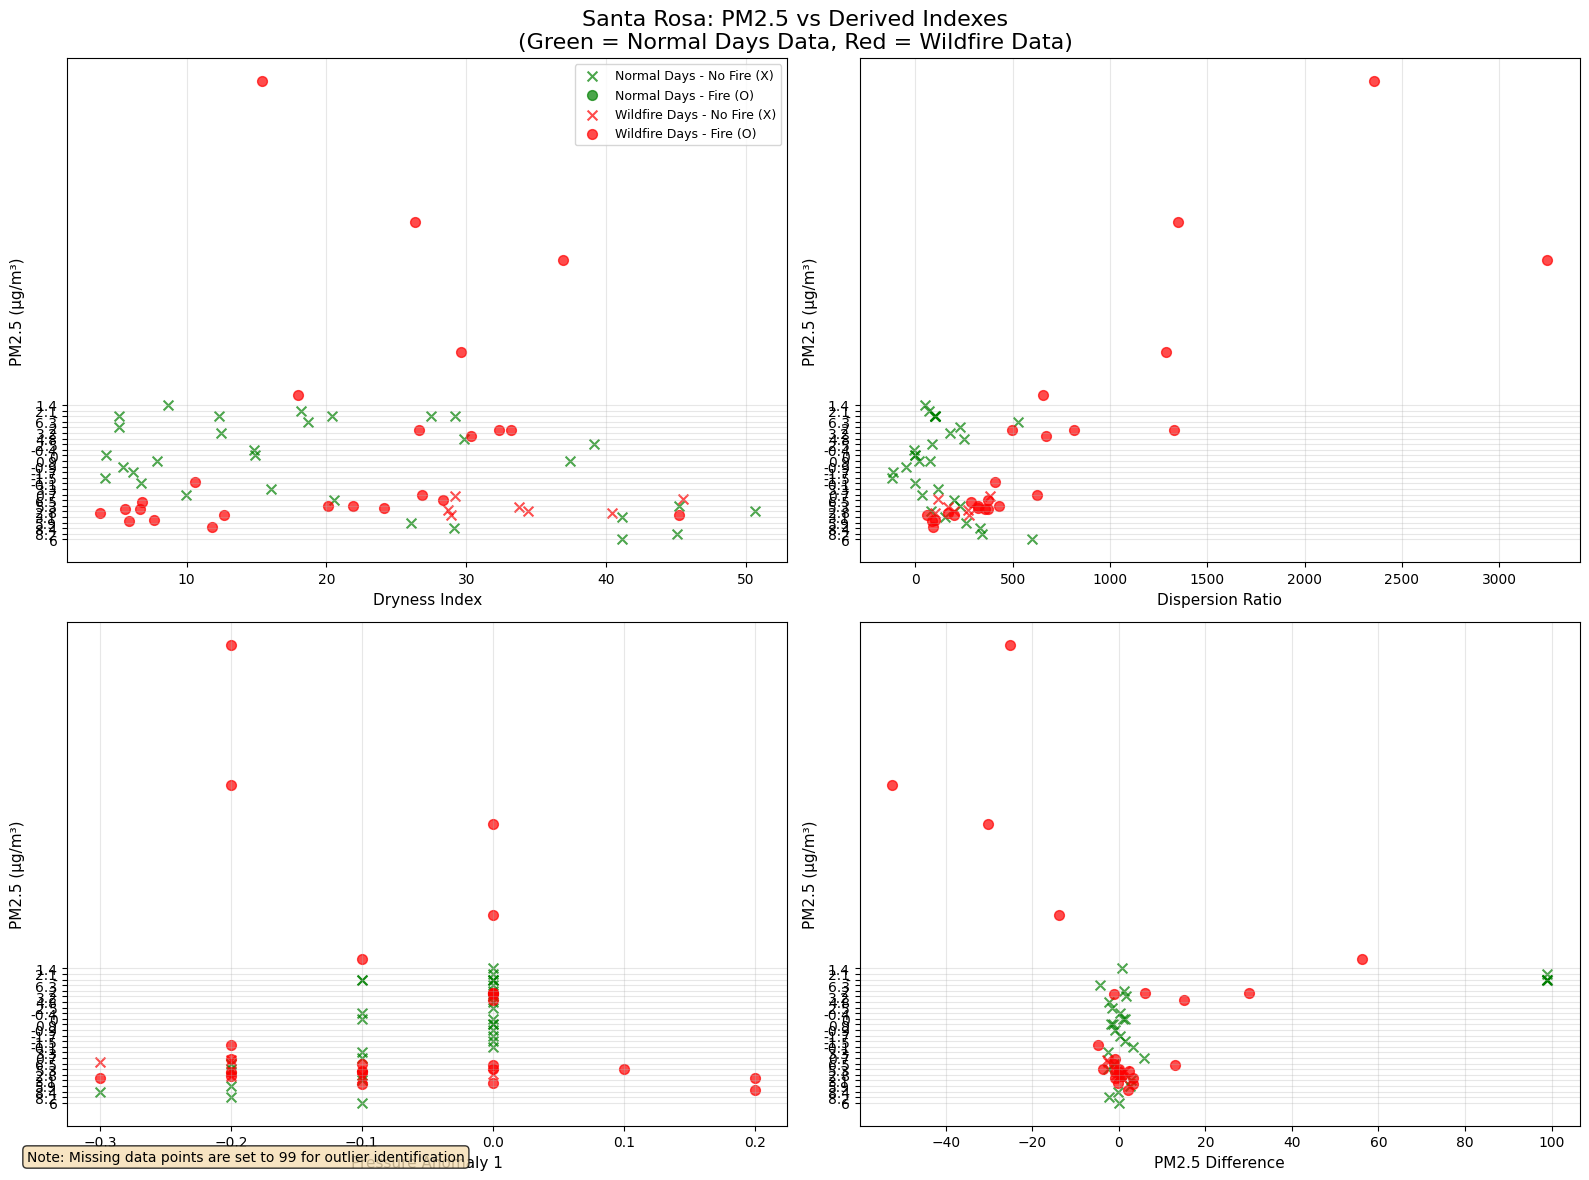

Summary Statistics for Derived Indexes vs PM2.5:

Dryness Index:
  Mean: 22.27
  Median: 21.23
  Max: 50.62
  Min: 3.80
  Missing data (set to 99): 0

Dispersion Ratio:


TypeError: can only concatenate str (not "float") to str

In [ ]:
# Create scatter plots comparing PM2.5 against the four derived indexes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Santa Rosa: PM2.5 vs Derived Indexes\n(Green = Normal Days Data, Red = Wildfire Data)', fontsize=16)

# Define the derived indexes to plot
indexes = ['dryness_index ', 'dispersion_ratio', 'PressureAnomaly1', 'pm2.5 difference']
index_names = ['Dryness Index', 'Dispersion Ratio', 'Pressure Anomaly 1', 'PM2.5 Difference']

# Flatten axes for easier indexing
axes = axes.flatten()

for i, (index, name) in enumerate(zip(indexes, index_names)):
    ax = axes[i]
    
    # Handle missing data for this index (set to 99 for outlier identification)
    santa_rosa_normal[index] = pd.to_numeric(santa_rosa_normal[index], errors='coerce').fillna(99)
    santa_rosa_wildfire[index] = pd.to_numeric(santa_rosa_wildfire[index], errors='coerce').fillna(99)
    
    # Separate data by dataset source and fire day status
    normal_no_fire = santa_rosa_normal[santa_rosa_normal['yn'] == 0]
    normal_fire = santa_rosa_normal[santa_rosa_normal['yn'] == 1]
    wildfire_no_fire = santa_rosa_wildfire[santa_rosa_wildfire['yn'] == 0]
    wildfire_fire = santa_rosa_wildfire[santa_rosa_wildfire['yn'] == 1]
    
    # Create scatter plot
    # Green X markers for normal days with no fire
    ax.scatter(normal_no_fire[index], normal_no_fire['PM25_ugm3'], 
               marker='x', s=50, alpha=0.7, color='green', label='Normal Days - No Fire (X)')
    
    # Green O markers for normal days with fire
    ax.scatter(normal_fire[index], normal_fire['PM25_ugm3'], 
               marker='o', s=50, alpha=0.7, color='green', label='Normal Days - Fire (O)')
    
    # Red X markers for wildfire days with no fire
    ax.scatter(wildfire_no_fire[index], wildfire_no_fire['PM25_ugm3'], 
               marker='x', s=50, alpha=0.7, color='red', label='Wildfire Days - No Fire (X)')
    
    # Red O markers for wildfire days with fire
    ax.scatter(wildfire_fire[index], wildfire_fire['PM25_ugm3'], 
               marker='o', s=50, alpha=0.7, color='red', label='Wildfire Days - Fire (O)')
    
    # Customize each subplot
    ax.set_xlabel(name, fontsize=11)
    ax.set_ylabel('PM2.5 (μg/m³)', fontsize=11)
    ax.grid(True, alpha=0.3)
    
    # Add legend only to the first subplot to avoid clutter
    if i == 0:
        ax.legend(fontsize=9, loc='upper right')

# Add overall note about missing data
fig.text(0.02, 0.02, 'Note: Missing data points are set to 99 for outlier identification', 
         fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Print summary statistics for each index
print("Summary Statistics for Derived Indexes vs PM2.5:")
for index, name in zip(indexes, index_names):
    print(f"\n{name}:")
    print(f"  Mean: {combined_data[index].mean():.2f}")
    print(f"  Median: {combined_data[index].median():.2f}")
    print(f"  Max: {combined_data[index].max():.2f}")
    print(f"  Min: {combined_data[index].min():.2f}")
    print(f"  Missing data (set to 99): {(combined_data[index] == 99).sum()}")


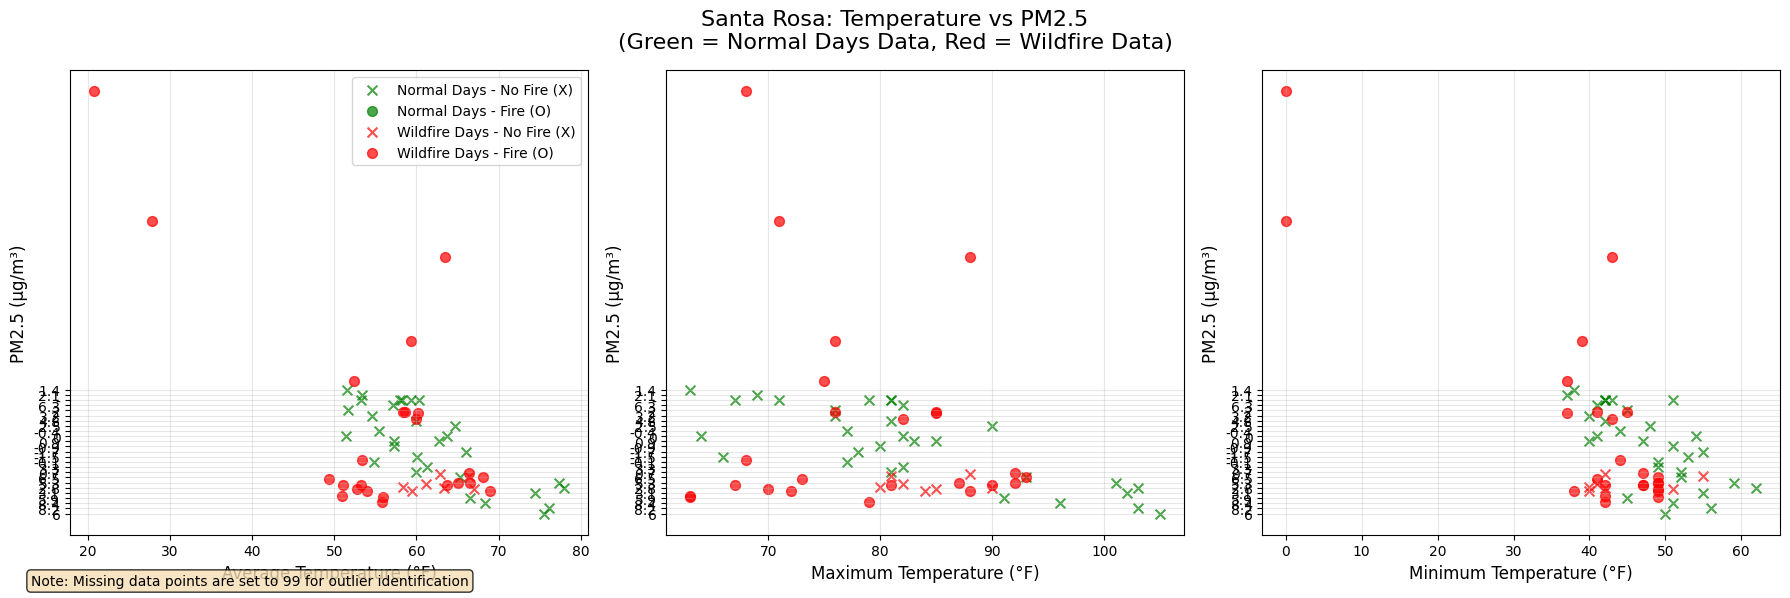

Summary Statistics for Temperature Variables vs PM2.5:

Average Temperature (°F):
  Mean: 59.48 °F
  Median: 59.65 °F
  Max: 78.00 °F
  Min: 20.70 °F
  Missing data (set to 99): 0

Maximum Temperature (°F):
  Mean: 81.27 °F
  Median: 81.00 °F
  Max: 105.00 °F
  Min: 63.00 °F
  Missing data (set to 99): 0

Minimum Temperature (°F):
  Mean: 44.45 °F
  Median: 44.50 °F
  Max: 62.00 °F
  Min: 0.00 °F
  Missing data (set to 99): 0


In [ ]:
# Create scatter plots comparing temperature variables against PM2.5
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Santa Rosa: Temperature vs PM2.5\n(Green = Normal Days Data, Red = Wildfire Data)', fontsize=16)

# Define the temperature variables to plot
temp_vars = ['Avg_Temp_F', 'Max_Temp_F', 'Min_Temp_F']
temp_names = ['Average Temperature (°F)', 'Maximum Temperature (°F)', 'Minimum Temperature (°F)']

for i, (temp_var, name) in enumerate(zip(temp_vars, temp_names)):
    ax = axes[i]
    
    # Handle missing data for temperature (set to 99 for outlier identification)
    santa_rosa_normal[temp_var] = pd.to_numeric(santa_rosa_normal[temp_var], errors='coerce').fillna(99)
    santa_rosa_wildfire[temp_var] = pd.to_numeric(santa_rosa_wildfire[temp_var], errors='coerce').fillna(99)
    
    # Separate data by dataset source and fire day status
    normal_no_fire = santa_rosa_normal[santa_rosa_normal['yn'] == 0]
    normal_fire = santa_rosa_normal[santa_rosa_normal['yn'] == 1]
    wildfire_no_fire = santa_rosa_wildfire[santa_rosa_wildfire['yn'] == 0]
    wildfire_fire = santa_rosa_wildfire[santa_rosa_wildfire['yn'] == 1]
    
    # Create scatter plot
    # Green X markers for normal days with no fire
    ax.scatter(normal_no_fire[temp_var], normal_no_fire['PM25_ugm3'], 
               marker='x', s=50, alpha=0.7, color='green', label='Normal Days - No Fire (X)')
    
    # Green O markers for normal days with fire
    ax.scatter(normal_fire[temp_var], normal_fire['PM25_ugm3'], 
               marker='o', s=50, alpha=0.7, color='green', label='Normal Days - Fire (O)')
    
    # Red X markers for wildfire days with no fire
    ax.scatter(wildfire_no_fire[temp_var], wildfire_no_fire['PM25_ugm3'], 
               marker='x', s=50, alpha=0.7, color='red', label='Wildfire Days - No Fire (X)')
    
    # Red O markers for wildfire days with fire
    ax.scatter(wildfire_fire[temp_var], wildfire_fire['PM25_ugm3'], 
               marker='o', s=50, alpha=0.7, color='red', label='Wildfire Days - Fire (O)')
    
    # Customize each subplot
    ax.set_xlabel(name, fontsize=12)
    ax.set_ylabel('PM2.5 (μg/m³)', fontsize=12)
    ax.grid(True, alpha=0.3)
    
    # Add legend only to the first subplot to avoid clutter
    if i == 0:
        ax.legend(fontsize=10, loc='upper right')

# Add overall note about missing data
fig.text(0.02, 0.02, 'Note: Missing data points are set to 99 for outlier identification', 
         fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Print summary statistics for each temperature variable
print("Summary Statistics for Temperature Variables vs PM2.5:")
for temp_var, name in zip(temp_vars, temp_names):
    print(f"\n{name}:")
    print(f"  Mean: {combined_data[temp_var].mean():.2f} °F")
    print(f"  Median: {combined_data[temp_var].median():.2f} °F")
    print(f"  Max: {combined_data[temp_var].max():.2f} °F")
    print(f"  Min: {combined_data[temp_var].min():.2f} °F")
    print(f"  Missing data (set to 99): {(combined_data[temp_var] == 99).sum()}")


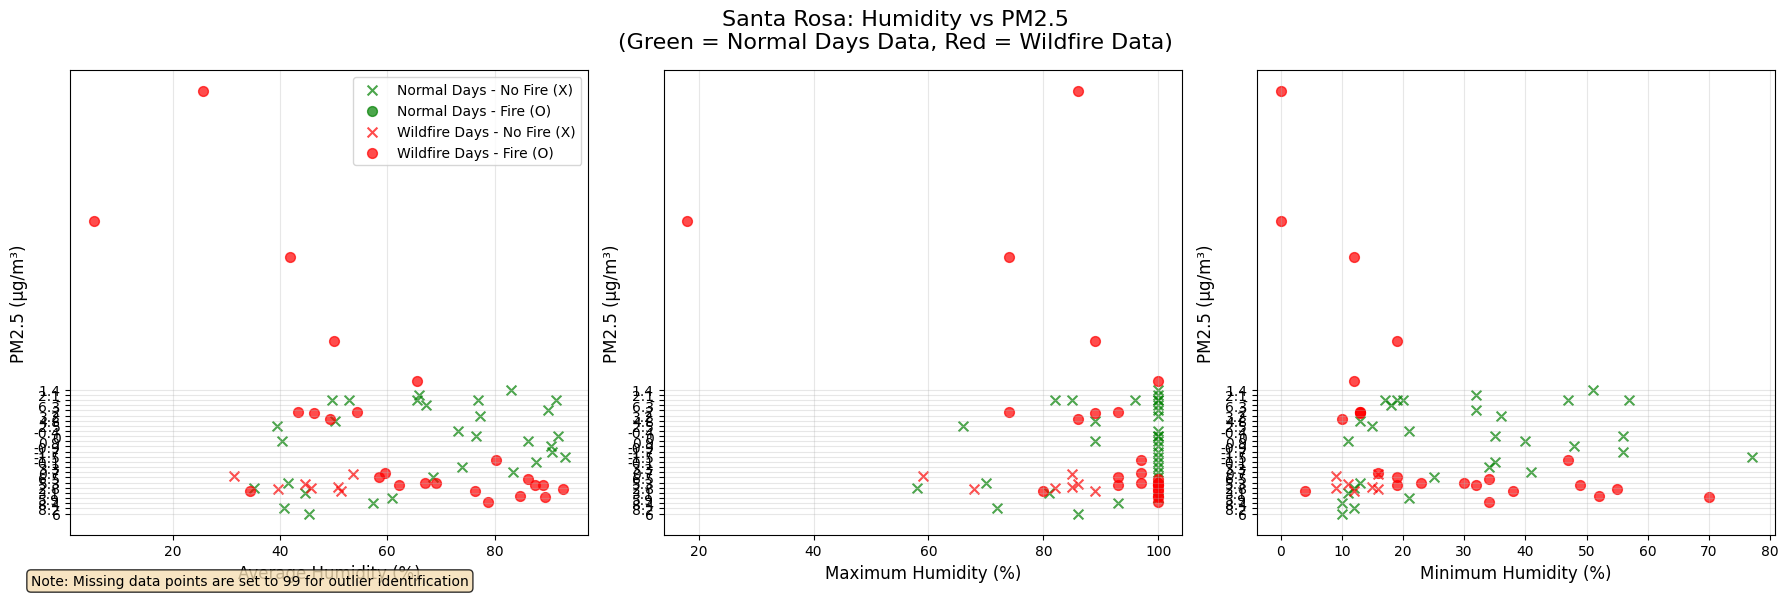

Summary Statistics for Humidity Variables vs PM2.5:

Average Humidity (%):
  Mean: 63.01%
  Median: 63.90%
  Max: 93.10%
  Min: 5.30%
  Missing data (set to 99): 0

Maximum Humidity (%):
  Mean: 90.11%
  Median: 97.00%
  Max: 100.00%
  Min: 18.00%
  Missing data (set to 99): 0

Minimum Humidity (%):
  Mean: 26.24%
  Median: 19.00%
  Max: 77.00%
  Min: 0.00%
  Missing data (set to 99): 0


In [ ]:
# Create scatter plots comparing humidity variables against PM2.5
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Santa Rosa: Humidity vs PM2.5\n(Green = Normal Days Data, Red = Wildfire Data)', fontsize=16)

# Define the humidity variables to plot
humidity_vars = ['Avg_Humidity_', 'Max_Humidity_', 'Min_Humidity_']
humidity_names = ['Average Humidity (%)', 'Maximum Humidity (%)', 'Minimum Humidity (%)']

for i, (humidity_var, name) in enumerate(zip(humidity_vars, humidity_names)):
    ax = axes[i]
    
    # Handle missing data for humidity (set to 99 for outlier identification)
    santa_rosa_normal[humidity_var] = pd.to_numeric(santa_rosa_normal[humidity_var], errors='coerce').fillna(99)
    santa_rosa_wildfire[humidity_var] = pd.to_numeric(santa_rosa_wildfire[humidity_var], errors='coerce').fillna(99)
    
    # Separate data by dataset source and fire day status
    normal_no_fire = santa_rosa_normal[santa_rosa_normal['yn'] == 0]
    normal_fire = santa_rosa_normal[santa_rosa_normal['yn'] == 1]
    wildfire_no_fire = santa_rosa_wildfire[santa_rosa_wildfire['yn'] == 0]
    wildfire_fire = santa_rosa_wildfire[santa_rosa_wildfire['yn'] == 1]
    
    # Create scatter plot
    # Green X markers for normal days with no fire
    ax.scatter(normal_no_fire[humidity_var], normal_no_fire['PM25_ugm3'], 
               marker='x', s=50, alpha=0.7, color='green', label='Normal Days - No Fire (X)')
    
    # Green O markers for normal days with fire
    ax.scatter(normal_fire[humidity_var], normal_fire['PM25_ugm3'], 
               marker='o', s=50, alpha=0.7, color='green', label='Normal Days - Fire (O)')
    
    # Red X markers for wildfire days with no fire
    ax.scatter(wildfire_no_fire[humidity_var], wildfire_no_fire['PM25_ugm3'], 
               marker='x', s=50, alpha=0.7, color='red', label='Wildfire Days - No Fire (X)')
    
    # Red O markers for wildfire days with fire
    ax.scatter(wildfire_fire[humidity_var], wildfire_fire['PM25_ugm3'], 
               marker='o', s=50, alpha=0.7, color='red', label='Wildfire Days - Fire (O)')
    
    # Customize each subplot
    ax.set_xlabel(name, fontsize=12)
    ax.set_ylabel('PM2.5 (μg/m³)', fontsize=12)
    ax.grid(True, alpha=0.3)
    
    # Add legend only to the first subplot to avoid clutter
    if i == 0:
        ax.legend(fontsize=10, loc='upper right')

# Add overall note about missing data
fig.text(0.02, 0.02, 'Note: Missing data points are set to 99 for outlier identification', 
         fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Print summary statistics for each humidity variable
print("Summary Statistics for Humidity Variables vs PM2.5:")
for humidity_var, name in zip(humidity_vars, humidity_names):
    print(f"\n{name}:")
    print(f"  Mean: {combined_data[humidity_var].mean():.2f}%")
    print(f"  Median: {combined_data[humidity_var].median():.2f}%")
    print(f"  Max: {combined_data[humidity_var].max():.2f}%")
    print(f"  Min: {combined_data[humidity_var].min():.2f}%")
    print(f"  Missing data (set to 99): {(combined_data[humidity_var] == 99).sum()}")


Paradise cities normal data shape: (60, 23)
Paradise cities wildfire data shape: (30, 23)

Cities containing 'Paradise' found:
Normal data cities: ['Oroville/Paradise']
Wildfire data cities: ['Paradise/Butte']


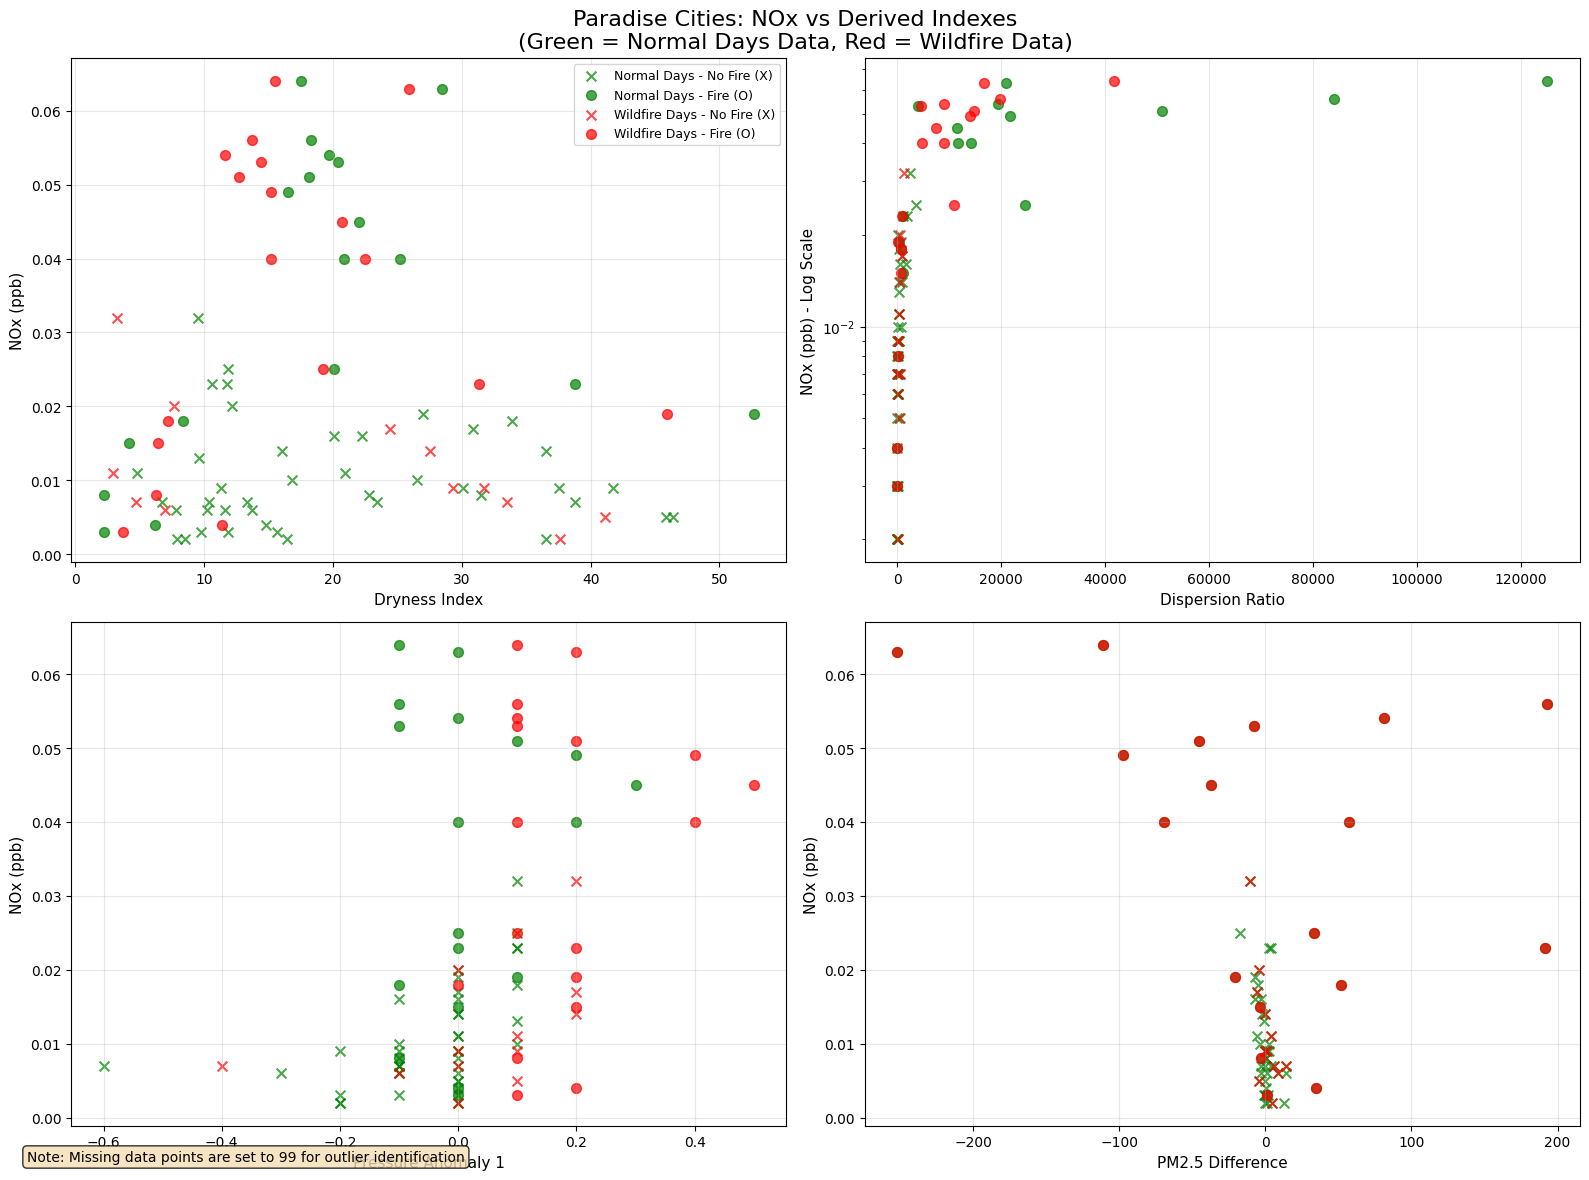

Summary Statistics for Paradise Cities:
Total data points: 90
Normal days data: 60
Wildfire days data: 30

Normal Days Data:
  No fire days: 42
  Fire days: 18

Wildfire Days Data:
  No fire days: 12
  Fire days: 18

Summary Statistics for Derived Indexes:

Dryness Index:
  Mean: 19.30
  Median: 16.47
  Max: 52.67
  Min: 2.19
  Missing data (set to 99): 0

Dispersion Ratio:
  Mean: 6387.28
  Median: 464.00
  Max: 125130.00
  Min: 34.44
  Missing data (set to 99): 0

Pressure Anomaly 1:
  Mean: 0.02
  Median: 0.00
  Max: 0.50
  Min: -0.60
  Missing data (set to 99): 0

PM2.5 Difference:
  Mean: -0.00
  Median: 0.00
  Max: 193.10
  Min: -252.00
  Missing data (set to 99): 0


In [ ]:
# Filter data for cities containing "Paradise"
paradise_normal = normal_data[normal_data['City'].str.contains('Paradise', case=False, na=False)].copy()
paradise_wildfire = wildfire_data[wildfire_data['City'].str.contains('Paradise', case=False, na=False)].copy()

# Convert NOx to numeric format to fix axis ordering
paradise_normal['NOx_ppb'] = pd.to_numeric(paradise_normal['NOx_ppb'], errors='coerce').fillna(99)
paradise_wildfire['NOx_ppb'] = pd.to_numeric(paradise_wildfire['NOx_ppb'], errors='coerce').fillna(99)

print("Paradise cities normal data shape:", paradise_normal.shape)
print("Paradise cities wildfire data shape:", paradise_wildfire.shape)

# Display unique cities found
print("\nCities containing 'Paradise' found:")
print("Normal data cities:", paradise_normal['City'].unique())
print("Wildfire data cities:", paradise_wildfire['City'].unique())

# Create scatter plots comparing NOx against the four derived indexes for Paradise cities
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Paradise Cities: NOx vs Derived Indexes\n(Green = Normal Days Data, Red = Wildfire Data)', fontsize=16)

# Define the derived indexes to plot
indexes = ['dryness_index ', 'dispersion_ratio', 'PressureAnomaly1', 'pm2.5 difference']
index_names = ['Dryness Index', 'Dispersion Ratio', 'Pressure Anomaly 1', 'PM2.5 Difference']

# Flatten axes for easier indexing
axes = axes.flatten()

for i, (index, name) in enumerate(zip(indexes, index_names)):
    ax = axes[i]
    
    # Handle missing data for this index (set to 99 for outlier identification)
    paradise_normal[index] = pd.to_numeric(paradise_normal[index], errors='coerce').fillna(99)
    paradise_wildfire[index] = pd.to_numeric(paradise_wildfire[index], errors='coerce').fillna(99)
    
    # Separate data by dataset source and fire day status
    normal_no_fire = paradise_normal[paradise_normal['yn'] == 0]
    normal_fire = paradise_normal[paradise_normal['yn'] == 1]
    wildfire_no_fire = paradise_wildfire[paradise_wildfire['yn'] == 0]
    wildfire_fire = paradise_wildfire[paradise_wildfire['yn'] == 1]
    
    # Create scatter plot
    # Green X markers for normal days with no fire
    ax.scatter(normal_no_fire[index], normal_no_fire['NOx_ppb'], 
               marker='x', s=50, alpha=0.7, color='green', label='Normal Days - No Fire (X)')
    
    # Green O markers for normal days with fire
    ax.scatter(normal_fire[index], normal_fire['NOx_ppb'], 
               marker='o', s=50, alpha=0.7, color='green', label='Normal Days - Fire (O)')
    
    # Red X markers for wildfire days with no fire
    ax.scatter(wildfire_no_fire[index], wildfire_no_fire['NOx_ppb'], 
               marker='x', s=50, alpha=0.7, color='red', label='Wildfire Days - No Fire (X)')
    
    # Red O markers for wildfire days with fire
    ax.scatter(wildfire_fire[index], wildfire_fire['NOx_ppb'], 
               marker='o', s=50, alpha=0.7, color='red', label='Wildfire Days - Fire (O)')
    
    # Customize each subplot
    ax.set_xlabel(name, fontsize=11)
    ax.set_ylabel('NOx (ppb)', fontsize=11)
    ax.grid(True, alpha=0.3)
    
    # Use logarithmic scale for dispersion ratio due to extreme range
    if index == 'dispersion_ratio':
        ax.set_yscale('log')
        ax.set_ylabel('NOx (ppb) - Log Scale', fontsize=11)
    
    # Add legend only to the first subplot to avoid clutter
    if i == 0:
        ax.legend(fontsize=9, loc='upper right')

# Add overall note about missing data
fig.text(0.02, 0.02, 'Note: Missing data points are set to 99 for outlier identification', 
         fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Combine Paradise data for statistics
paradise_combined = pd.concat([paradise_normal, paradise_wildfire], ignore_index=True)

# Print summary statistics for Paradise cities
print("Summary Statistics for Paradise Cities:")
print(f"Total data points: {len(paradise_combined)}")
print(f"Normal days data: {len(paradise_normal)}")
print(f"Wildfire days data: {len(paradise_wildfire)}")
print(f"\nNormal Days Data:")
print(f"  No fire days: {len(paradise_normal[paradise_normal['yn'] == 0])}")
print(f"  Fire days: {len(paradise_normal[paradise_normal['yn'] == 1])}")
print(f"\nWildfire Days Data:")
print(f"  No fire days: {len(paradise_wildfire[paradise_wildfire['yn'] == 0])}")
print(f"  Fire days: {len(paradise_wildfire[paradise_wildfire['yn'] == 1])}")

print("\nSummary Statistics for Derived Indexes:")
for index, name in zip(indexes, index_names):
    print(f"\n{name}:")
    print(f"  Mean: {paradise_combined[index].mean():.2f}")
    print(f"  Median: {paradise_combined[index].median():.2f}")
    print(f"  Max: {paradise_combined[index].max():.2f}")
    print(f"  Min: {paradise_combined[index].min():.2f}")
    print(f"  Missing data (set to 99): {(paradise_combined[index] == 99).sum()}")


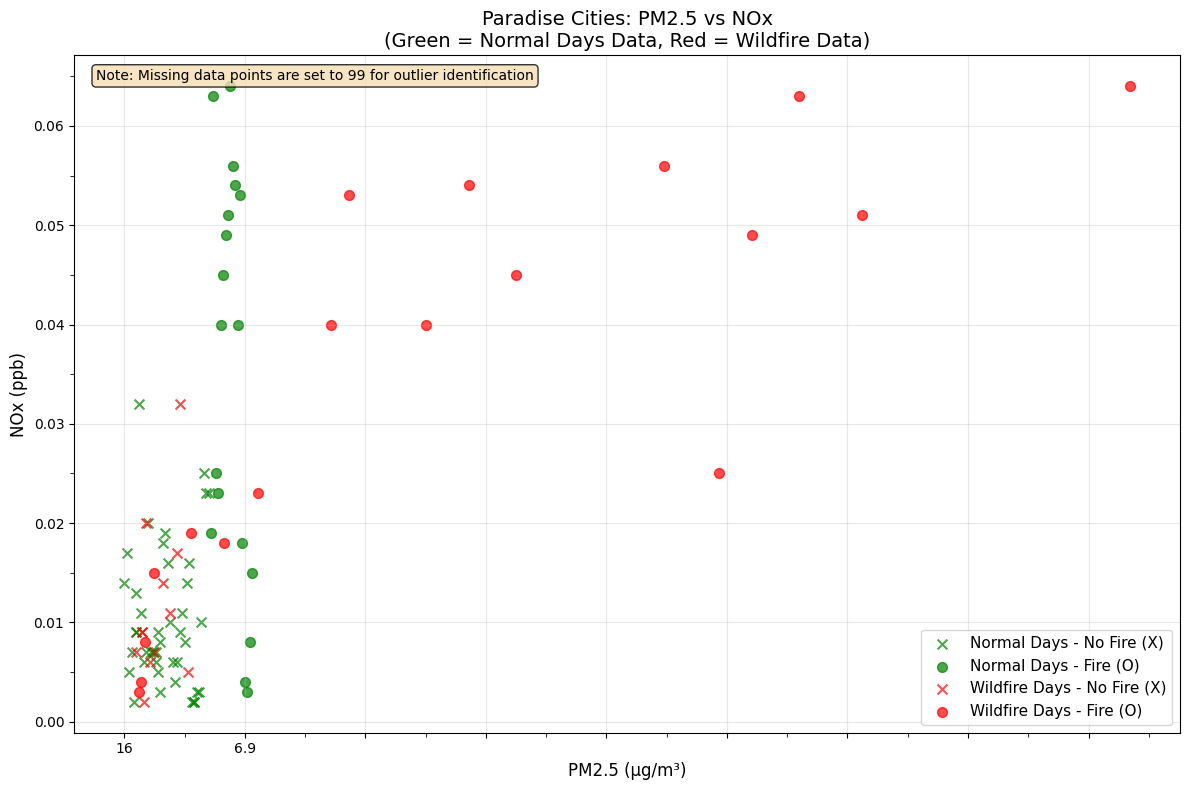

Summary Statistics for Paradise Cities - NOx vs PM2.5:
Total data points: 90
Normal days data: 60
Wildfire days data: 30

Normal Days Data:
  No fire days: 42
  Fire days: 18

Wildfire Days Data:
  No fire days: 12
  Fire days: 18

NOx Statistics:
  Mean: 0.020 ppb
  Median: 0.014 ppb
  Max: 0.064 ppb
  Min: 0.002 ppb

PM2.5 Statistics:


TypeError: can only concatenate str (not "float") to str

In [ ]:
# Create scatter plot comparing NOx and PM2.5 for Paradise cities
plt.figure(figsize=(12, 8))

# Separate data by dataset source and fire day status
normal_no_fire = paradise_normal[paradise_normal['yn'] == 0]
normal_fire = paradise_normal[paradise_normal['yn'] == 1]
wildfire_no_fire = paradise_wildfire[paradise_wildfire['yn'] == 0]
wildfire_fire = paradise_wildfire[paradise_wildfire['yn'] == 1]

# Create scatter plot
# Green X markers for normal days with no fire
plt.scatter(normal_no_fire['PM25_ugm3'], normal_no_fire['NOx_ppb'], 
           marker='x', s=50, alpha=0.7, color='green', label='Normal Days - No Fire (X)')

# Green O markers for normal days with fire
plt.scatter(normal_fire['PM25_ugm3'], normal_fire['NOx_ppb'], 
           marker='o', s=50, alpha=0.7, color='green', label='Normal Days - Fire (O)')

# Red X markers for wildfire days with no fire
plt.scatter(wildfire_no_fire['PM25_ugm3'], wildfire_no_fire['NOx_ppb'], 
           marker='x', s=50, alpha=0.7, color='red', label='Wildfire Days - No Fire (X)')

# Red O markers for wildfire days with fire
plt.scatter(wildfire_fire['PM25_ugm3'], wildfire_fire['NOx_ppb'], 
           marker='o', s=50, alpha=0.7, color='red', label='Wildfire Days - Fire (O)')

# Customize the plot
plt.xlabel('PM2.5 (μg/m³)', fontsize=12)
plt.ylabel('NOx (ppb)', fontsize=12)
plt.title('Paradise Cities: PM2.5 vs NOx\n(Green = Normal Days Data, Red = Wildfire Data)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Improve axis spacing and labeling
# X-axis (PM2.5) - major ticks every 50 units, minor every 25
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(50))
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(25))
plt.gca().tick_params(axis='x', which='major', labelsize=10)
plt.gca().tick_params(axis='x', which='minor', length=3)

# Y-axis (NOx) - major ticks every 0.01 units, minor every 0.005
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.01))
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.005))
plt.gca().tick_params(axis='y', which='major', labelsize=10)
plt.gca().tick_params(axis='y', which='minor', length=3)

# Add note about missing data
plt.text(0.02, 0.98, 'Note: Missing data points are set to 99 for outlier identification', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Print summary statistics
print("Summary Statistics for Paradise Cities - NOx vs PM2.5:")
print(f"Total data points: {len(paradise_combined)}")
print(f"Normal days data: {len(paradise_normal)}")
print(f"Wildfire days data: {len(paradise_wildfire)}")
print(f"\nNormal Days Data:")
print(f"  No fire days: {len(normal_no_fire)}")
print(f"  Fire days: {len(normal_fire)}")
print(f"\nWildfire Days Data:")
print(f"  No fire days: {len(wildfire_no_fire)}")
print(f"  Fire days: {len(wildfire_fire)}")
print(f"\nNOx Statistics:")
print(f"  Mean: {paradise_combined['NOx_ppb'].mean():.3f} ppb")
print(f"  Median: {paradise_combined['NOx_ppb'].median():.3f} ppb")
print(f"  Max: {paradise_combined['NOx_ppb'].max():.3f} ppb")
print(f"  Min: {paradise_combined['NOx_ppb'].min():.3f} ppb")
print(f"\nPM2.5 Statistics:")
print(f"  Mean: {paradise_combined['PM25_ugm3'].mean():.2f} μg/m³")
print(f"  Median: {paradise_combined['PM25_ugm3'].median():.2f} μg/m³")
print(f"  Max: {paradise_combined['PM25_ugm3'].max():.2f} μg/m³")
print(f"  Min: {paradise_combined['PM25_ugm3'].min():.2f} μg/m³")


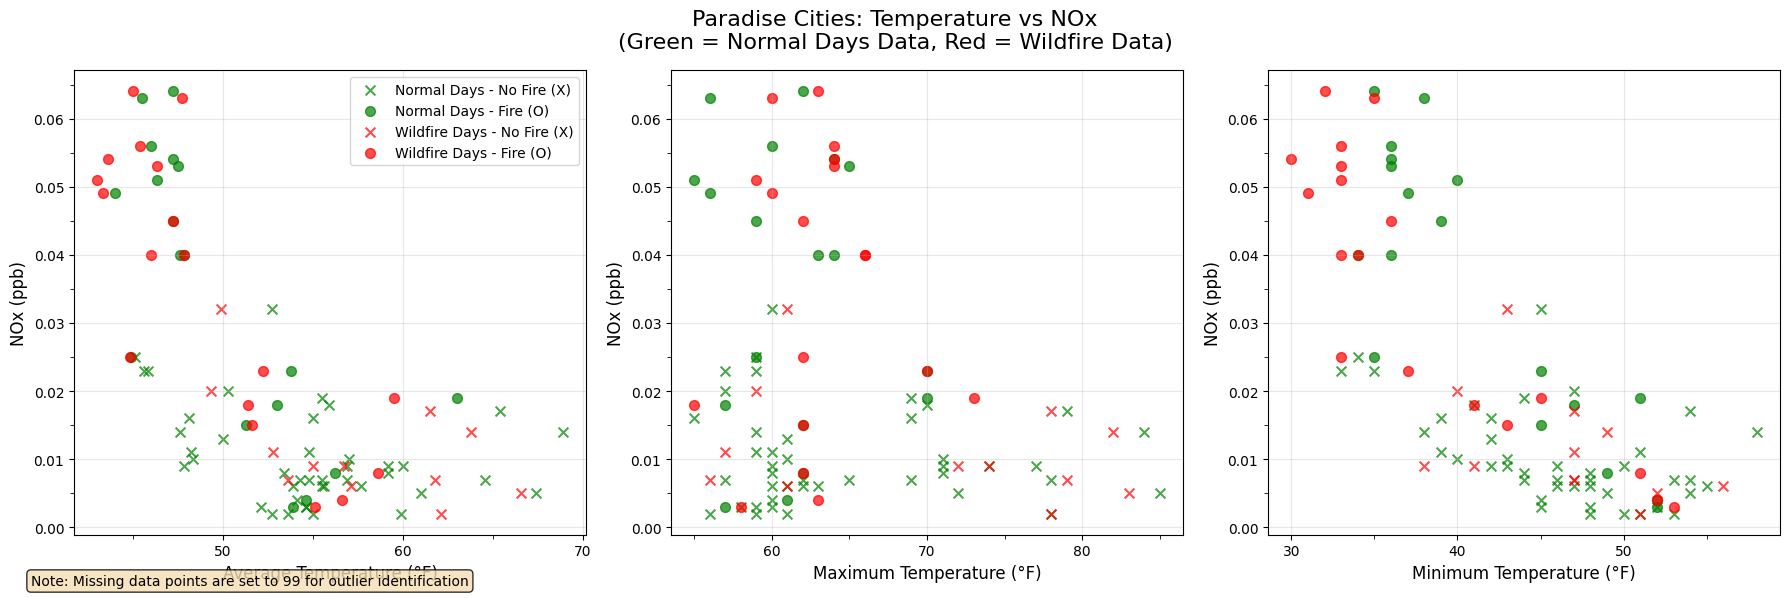

Summary Statistics for Paradise Cities - Temperature vs NOx:

Average Temperature (°F):
  Mean: 53.08 °F
  Median: 53.60 °F
  Max: 68.90 °F
  Min: 43.00 °F
  Missing data (set to 99): 0

Maximum Temperature (°F):
  Mean: 64.47 °F
  Median: 62.00 °F
  Max: 85.00 °F
  Min: 55.00 °F
  Missing data (set to 99): 0

Minimum Temperature (°F):
  Mean: 43.56 °F
  Median: 44.50 °F
  Max: 58.00 °F
  Min: 30.00 °F
  Missing data (set to 99): 0


In [ ]:
# Create scatter plots comparing temperature variables against NOx for Paradise cities
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Paradise Cities: Temperature vs NOx\n(Green = Normal Days Data, Red = Wildfire Data)', fontsize=16)

# Define the temperature variables to plot
temp_vars = ['Avg_Temp_F', 'Max_Temp_F', 'Min_Temp_F']
temp_names = ['Average Temperature (°F)', 'Maximum Temperature (°F)', 'Minimum Temperature (°F)']

for i, (temp_var, name) in enumerate(zip(temp_vars, temp_names)):
    ax = axes[i]
    
    # Handle missing data for temperature (set to 99 for outlier identification)
    paradise_normal[temp_var] = pd.to_numeric(paradise_normal[temp_var], errors='coerce').fillna(99)
    paradise_wildfire[temp_var] = pd.to_numeric(paradise_wildfire[temp_var], errors='coerce').fillna(99)
    
    # Separate data by dataset source and fire day status
    normal_no_fire = paradise_normal[paradise_normal['yn'] == 0]
    normal_fire = paradise_normal[paradise_normal['yn'] == 1]
    wildfire_no_fire = paradise_wildfire[paradise_wildfire['yn'] == 0]
    wildfire_fire = paradise_wildfire[paradise_wildfire['yn'] == 1]
    
    # Create scatter plot
    # Green X markers for normal days with no fire
    ax.scatter(normal_no_fire[temp_var], normal_no_fire['NOx_ppb'], 
               marker='x', s=50, alpha=0.7, color='green', label='Normal Days - No Fire (X)')
    
    # Green O markers for normal days with fire
    ax.scatter(normal_fire[temp_var], normal_fire['NOx_ppb'], 
               marker='o', s=50, alpha=0.7, color='green', label='Normal Days - Fire (O)')
    
    # Red X markers for wildfire days with no fire
    ax.scatter(wildfire_no_fire[temp_var], wildfire_no_fire['NOx_ppb'], 
               marker='x', s=50, alpha=0.7, color='red', label='Wildfire Days - No Fire (X)')
    
    # Red O markers for wildfire days with fire
    ax.scatter(wildfire_fire[temp_var], wildfire_fire['NOx_ppb'], 
               marker='o', s=50, alpha=0.7, color='red', label='Wildfire Days - Fire (O)')
    
    # Customize each subplot
    ax.set_xlabel(name, fontsize=12)
    ax.set_ylabel('NOx (ppb)', fontsize=12)
    ax.grid(True, alpha=0.3)
    
    # Improve axis spacing and labeling
    # X-axis (Temperature) - major ticks every 10°F, minor every 5°F
    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
    ax.tick_params(axis='x', which='major', labelsize=10)
    ax.tick_params(axis='x', which='minor', length=3)
    
    # Y-axis (NOx) - major ticks every 0.01 units, minor every 0.005
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.01))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(0.005))
    ax.tick_params(axis='y', which='major', labelsize=10)
    ax.tick_params(axis='y', which='minor', length=3)
    
    # Add legend only to the first subplot to avoid clutter
    if i == 0:
        ax.legend(fontsize=10, loc='upper right')

# Add overall note about missing data
fig.text(0.02, 0.02, 'Note: Missing data points are set to 99 for outlier identification', 
         fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Print summary statistics for each temperature variable
print("Summary Statistics for Paradise Cities - Temperature vs NOx:")
for temp_var, name in zip(temp_vars, temp_names):
    print(f"\n{name}:")
    print(f"  Mean: {paradise_combined[temp_var].mean():.2f} °F")
    print(f"  Median: {paradise_combined[temp_var].median():.2f} °F")
    print(f"  Max: {paradise_combined[temp_var].max():.2f} °F")
    print(f"  Min: {paradise_combined[temp_var].min():.2f} °F")
    print(f"  Missing data (set to 99): {(paradise_combined[temp_var] == 99).sum()}")


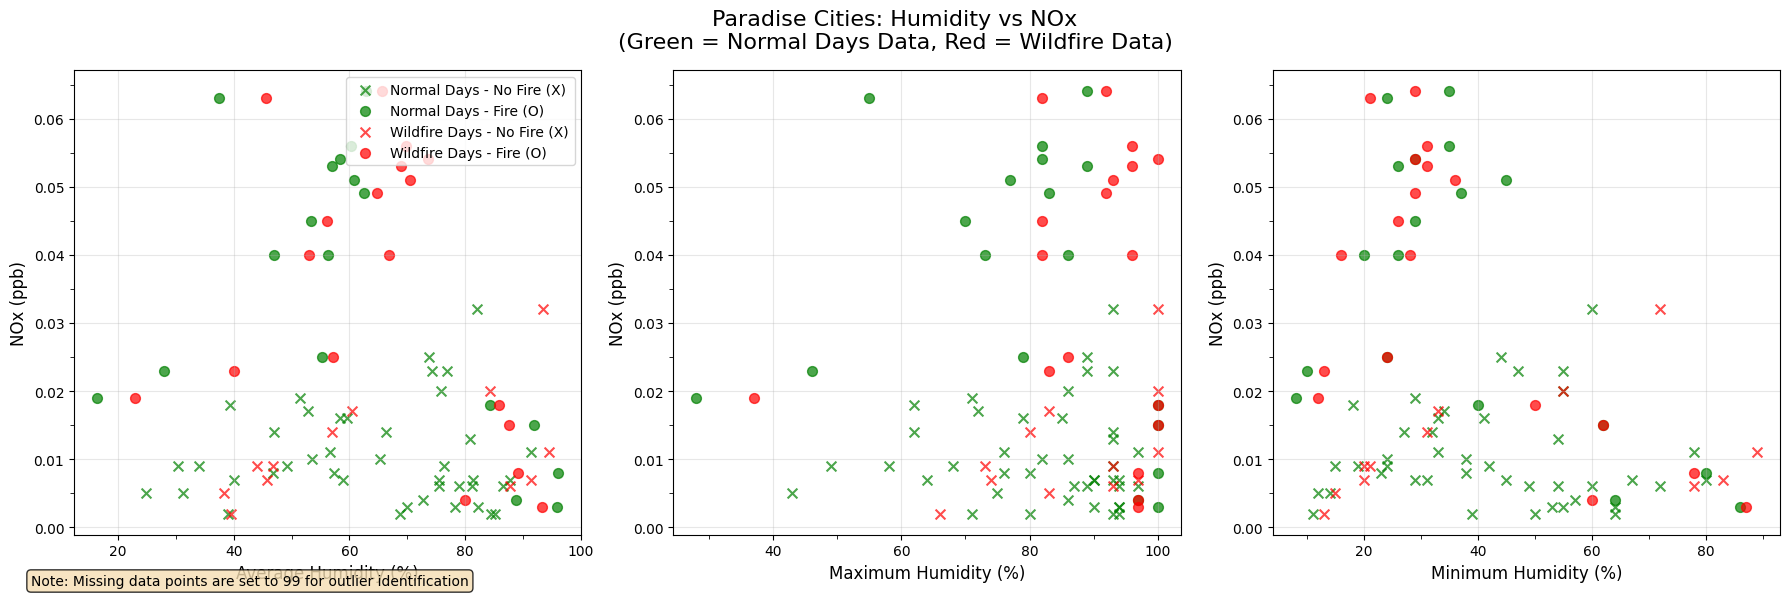

Summary Statistics for Paradise Cities - Humidity vs NOx:

Average Humidity (%):
  Mean: 64.29%
  Median: 65.00%
  Max: 96.10%
  Min: 16.40%
  Missing data (set to 99): 0

Maximum Humidity (%):
  Mean: 83.73%
  Median: 88.00%
  Max: 100.00%
  Min: 28.00%
  Missing data (set to 99): 0

Minimum Humidity (%):
  Mean: 40.46%
  Median: 34.50%
  Max: 89.00%
  Min: 8.00%
  Missing data (set to 99): 0


In [ ]:
# Create scatter plots comparing humidity variables against NOx for Paradise cities
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Paradise Cities: Humidity vs NOx\n(Green = Normal Days Data, Red = Wildfire Data)', fontsize=16)

# Define the humidity variables to plot
humidity_vars = ['Avg_Humidity_', 'Max_Humidity_', 'Min_Humidity_']
humidity_names = ['Average Humidity (%)', 'Maximum Humidity (%)', 'Minimum Humidity (%)']

for i, (humidity_var, name) in enumerate(zip(humidity_vars, humidity_names)):
    ax = axes[i]
    
    # Handle missing data for humidity (set to 99 for outlier identification)
    paradise_normal[humidity_var] = pd.to_numeric(paradise_normal[humidity_var], errors='coerce').fillna(99)
    paradise_wildfire[humidity_var] = pd.to_numeric(paradise_wildfire[humidity_var], errors='coerce').fillna(99)
    
    # Separate data by dataset source and fire day status
    normal_no_fire = paradise_normal[paradise_normal['yn'] == 0]
    normal_fire = paradise_normal[paradise_normal['yn'] == 1]
    wildfire_no_fire = paradise_wildfire[paradise_wildfire['yn'] == 0]
    wildfire_fire = paradise_wildfire[paradise_wildfire['yn'] == 1]
    
    # Create scatter plot
    # Green X markers for normal days with no fire
    ax.scatter(normal_no_fire[humidity_var], normal_no_fire['NOx_ppb'], 
               marker='x', s=50, alpha=0.7, color='green', label='Normal Days - No Fire (X)')
    
    # Green O markers for normal days with fire
    ax.scatter(normal_fire[humidity_var], normal_fire['NOx_ppb'], 
               marker='o', s=50, alpha=0.7, color='green', label='Normal Days - Fire (O)')
    
    # Red X markers for wildfire days with no fire
    ax.scatter(wildfire_no_fire[humidity_var], wildfire_no_fire['NOx_ppb'], 
               marker='x', s=50, alpha=0.7, color='red', label='Wildfire Days - No Fire (X)')
    
    # Red O markers for wildfire days with fire
    ax.scatter(wildfire_fire[humidity_var], wildfire_fire['NOx_ppb'], 
               marker='o', s=50, alpha=0.7, color='red', label='Wildfire Days - Fire (O)')
    
    # Customize each subplot
    ax.set_xlabel(name, fontsize=12)
    ax.set_ylabel('NOx (ppb)', fontsize=12)
    ax.grid(True, alpha=0.3)
    
    # Improve axis spacing and labeling
    # X-axis (Humidity) - major ticks every 20%, minor every 10%
    ax.xaxis.set_major_locator(plt.MultipleLocator(20))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(10))
    ax.tick_params(axis='x', which='major', labelsize=10)
    ax.tick_params(axis='x', which='minor', length=3)
    
    # Y-axis (NOx) - major ticks every 0.01 units, minor every 0.005
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.01))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(0.005))
    ax.tick_params(axis='y', which='major', labelsize=10)
    ax.tick_params(axis='y', which='minor', length=3)
    
    # Add legend only to the first subplot to avoid clutter
    if i == 0:
        ax.legend(fontsize=10, loc='upper right')

# Add overall note about missing data
fig.text(0.02, 0.02, 'Note: Missing data points are set to 99 for outlier identification', 
         fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Print summary statistics for each humidity variable
print("Summary Statistics for Paradise Cities - Humidity vs NOx:")
for humidity_var, name in zip(humidity_vars, humidity_names):
    print(f"\n{name}:")
    print(f"  Mean: {paradise_combined[humidity_var].mean():.2f}%")
    print(f"  Median: {paradise_combined[humidity_var].median():.2f}%")
    print(f"  Max: {paradise_combined[humidity_var].max():.2f}%")
    print(f"  Min: {paradise_combined[humidity_var].min():.2f}%")
    print(f"  Missing data (set to 99): {(paradise_combined[humidity_var] == 99).sum()}")


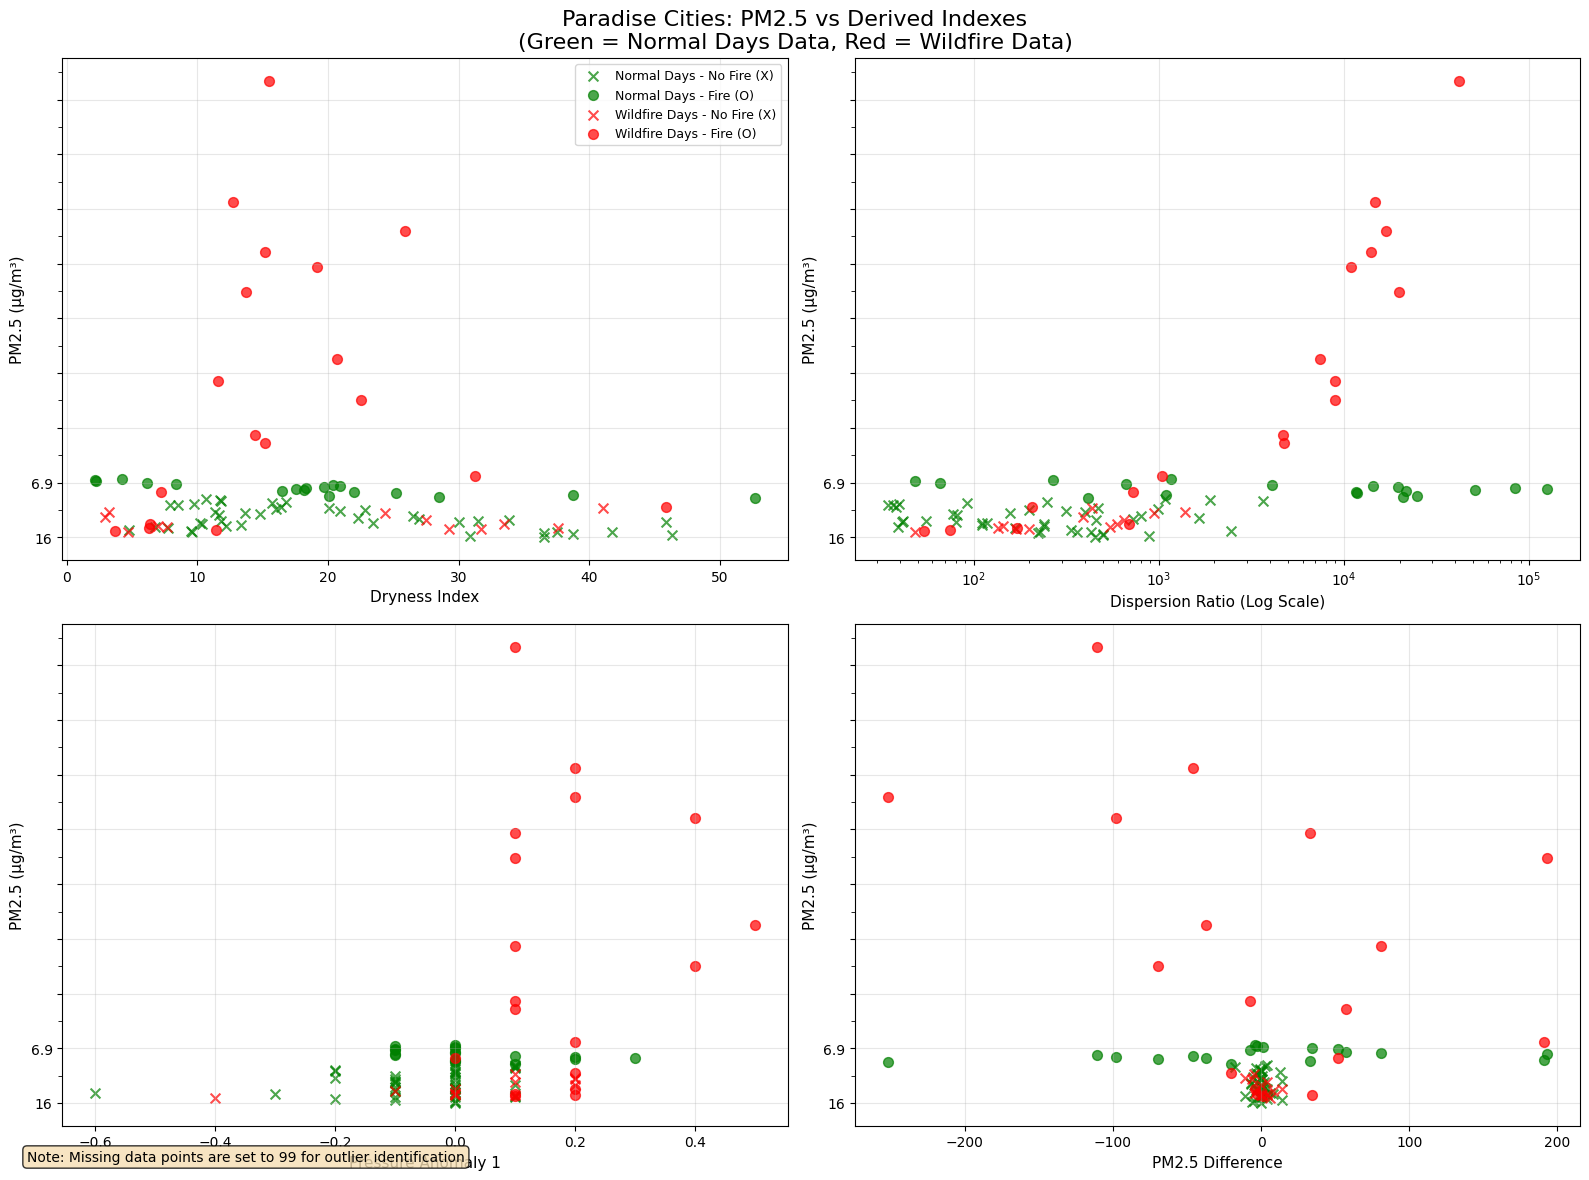

Summary Statistics for Paradise Cities - PM2.5 vs Derived Indexes:

Dryness Index:
  Mean: 19.30
  Median: 16.47
  Max: 52.67
  Min: 2.19
  Missing data (set to 99): 0

Dispersion Ratio:
  Mean: 6387.28
  Median: 464.00
  Max: 125130.00
  Min: 34.44
  Missing data (set to 99): 0

Pressure Anomaly 1:
  Mean: 0.02
  Median: 0.00
  Max: 0.50
  Min: -0.60
  Missing data (set to 99): 0

PM2.5 Difference:
  Mean: -0.00
  Median: 0.00
  Max: 193.10
  Min: -252.00
  Missing data (set to 99): 0


In [ ]:
# Create scatter plots comparing PM2.5 against the four derived indexes for Paradise cities
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Paradise Cities: PM2.5 vs Derived Indexes\n(Green = Normal Days Data, Red = Wildfire Data)', fontsize=16)

# Define the derived indexes to plot
indexes = ['dryness_index ', 'dispersion_ratio', 'PressureAnomaly1', 'pm2.5 difference']
index_names = ['Dryness Index', 'Dispersion Ratio', 'Pressure Anomaly 1', 'PM2.5 Difference']

# Flatten axes for easier indexing
axes = axes.flatten()

for i, (index, name) in enumerate(zip(indexes, index_names)):
    ax = axes[i]
    
    # Handle missing data for this index (set to 99 for outlier identification)
    paradise_normal[index] = pd.to_numeric(paradise_normal[index], errors='coerce').fillna(99)
    paradise_wildfire[index] = pd.to_numeric(paradise_wildfire[index], errors='coerce').fillna(99)
    
    # Separate data by dataset source and fire day status
    normal_no_fire = paradise_normal[paradise_normal['yn'] == 0]
    normal_fire = paradise_normal[paradise_normal['yn'] == 1]
    wildfire_no_fire = paradise_wildfire[paradise_wildfire['yn'] == 0]
    wildfire_fire = paradise_wildfire[paradise_wildfire['yn'] == 1]
    
    # Create scatter plot
    # Green X markers for normal days with no fire
    ax.scatter(normal_no_fire[index], normal_no_fire['PM25_ugm3'], 
               marker='x', s=50, alpha=0.7, color='green', label='Normal Days - No Fire (X)')
    
    # Green O markers for normal days with fire
    ax.scatter(normal_fire[index], normal_fire['PM25_ugm3'], 
               marker='o', s=50, alpha=0.7, color='green', label='Normal Days - Fire (O)')
    
    # Red X markers for wildfire days with no fire
    ax.scatter(wildfire_no_fire[index], wildfire_no_fire['PM25_ugm3'], 
               marker='x', s=50, alpha=0.7, color='red', label='Wildfire Days - No Fire (X)')
    
    # Red O markers for wildfire days with fire
    ax.scatter(wildfire_fire[index], wildfire_fire['PM25_ugm3'], 
               marker='o', s=50, alpha=0.7, color='red', label='Wildfire Days - Fire (O)')
    
    # Customize each subplot
    ax.set_xlabel(name, fontsize=11)
    ax.set_ylabel('PM2.5 (μg/m³)', fontsize=11)
    ax.grid(True, alpha=0.3)
    
    # Improve axis spacing and labeling
    # Y-axis (PM2.5) - major ticks every 50 units, minor every 25
    ax.yaxis.set_major_locator(plt.MultipleLocator(50))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(25))
    ax.tick_params(axis='y', which='major', labelsize=10)
    ax.tick_params(axis='y', which='minor', length=3)
    
    # X-axis labeling based on index type
    if index == 'dispersion_ratio':
        # Use logarithmic scale for dispersion ratio due to extreme range
        ax.set_xscale('log')
        ax.set_xlabel(name + ' (Log Scale)', fontsize=11)
    else:
        # Standard linear scale for other indexes
        ax.tick_params(axis='x', which='major', labelsize=10)
        ax.tick_params(axis='x', which='minor', length=3)
    
    # Add legend only to the first subplot to avoid clutter
    if i == 0:
        ax.legend(fontsize=9, loc='upper right')

# Add overall note about missing data
fig.text(0.02, 0.02, 'Note: Missing data points are set to 99 for outlier identification', 
         fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Print summary statistics for each index
print("Summary Statistics for Paradise Cities - PM2.5 vs Derived Indexes:")
for index, name in zip(indexes, index_names):
    print(f"\n{name}:")
    print(f"  Mean: {paradise_combined[index].mean():.2f}")
    print(f"  Median: {paradise_combined[index].median():.2f}")
    print(f"  Max: {paradise_combined[index].max():.2f}")
    print(f"  Min: {paradise_combined[index].min():.2f}")
    print(f"  Missing data (set to 99): {(paradise_combined[index] == 99).sum()}")


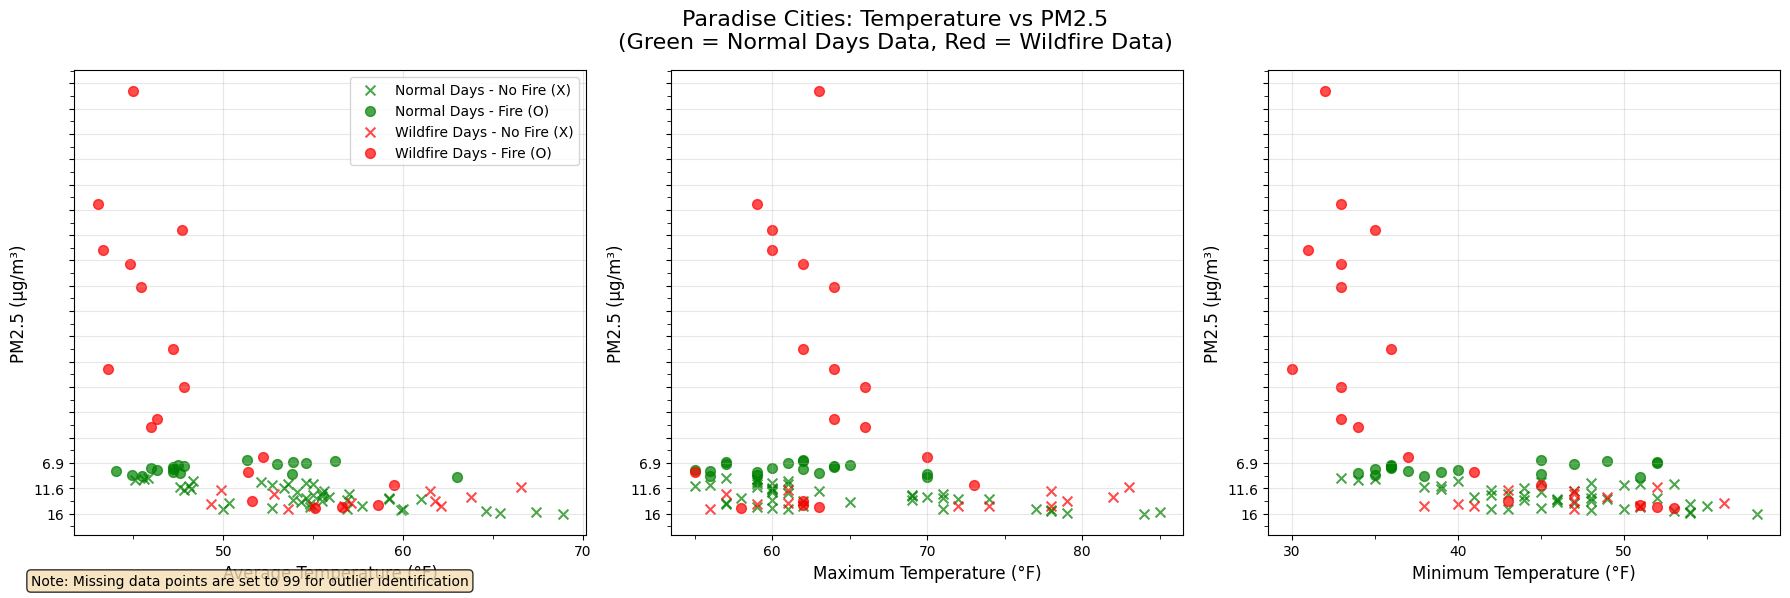

Summary Statistics for Paradise Cities - Temperature vs PM2.5:

Average Temperature (°F):
  Mean: 53.08 °F
  Median: 53.60 °F
  Max: 68.90 °F
  Min: 43.00 °F
  Missing data (set to 99): 0

Maximum Temperature (°F):
  Mean: 64.47 °F
  Median: 62.00 °F
  Max: 85.00 °F
  Min: 55.00 °F
  Missing data (set to 99): 0

Minimum Temperature (°F):
  Mean: 43.56 °F
  Median: 44.50 °F
  Max: 58.00 °F
  Min: 30.00 °F
  Missing data (set to 99): 0
